In [97]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

from gwbird import pls
from gwbird.skymap import Skymaps
from gwbird.overlap import Response
from gwbird.anisotropy import AngularResponse, Sensitivity_ell

%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example notebook for ET $\Delta$

* Response (Overlap Reduction function)

In [113]:
f = np.logspace(np.log10(1), np.log10(100000), 1000)

print('Calculating Overlaps ET triangular')
print('- tensor modes')
R_t = Response.overlap('ET X', 'ET Y', f, 't', 0, None)
print('- vector modes')
R_v = Response.overlap('ET X', 'ET Y', f, 'v', 0, None)
print('- scalar modes')
R_s = Response.overlap('ET X', 'ET Y', f, 's', 0, None)
print('- V')
R_V = Response.overlap('ET X', 'ET Y', f, 'V', 0, None)



Calculating Overlaps ET triangular
- tensor modes
- vector modes
- scalar modes
- V


Text(0.5, 1.0, 'ET $\\Delta$ Overlap Reduction Function')

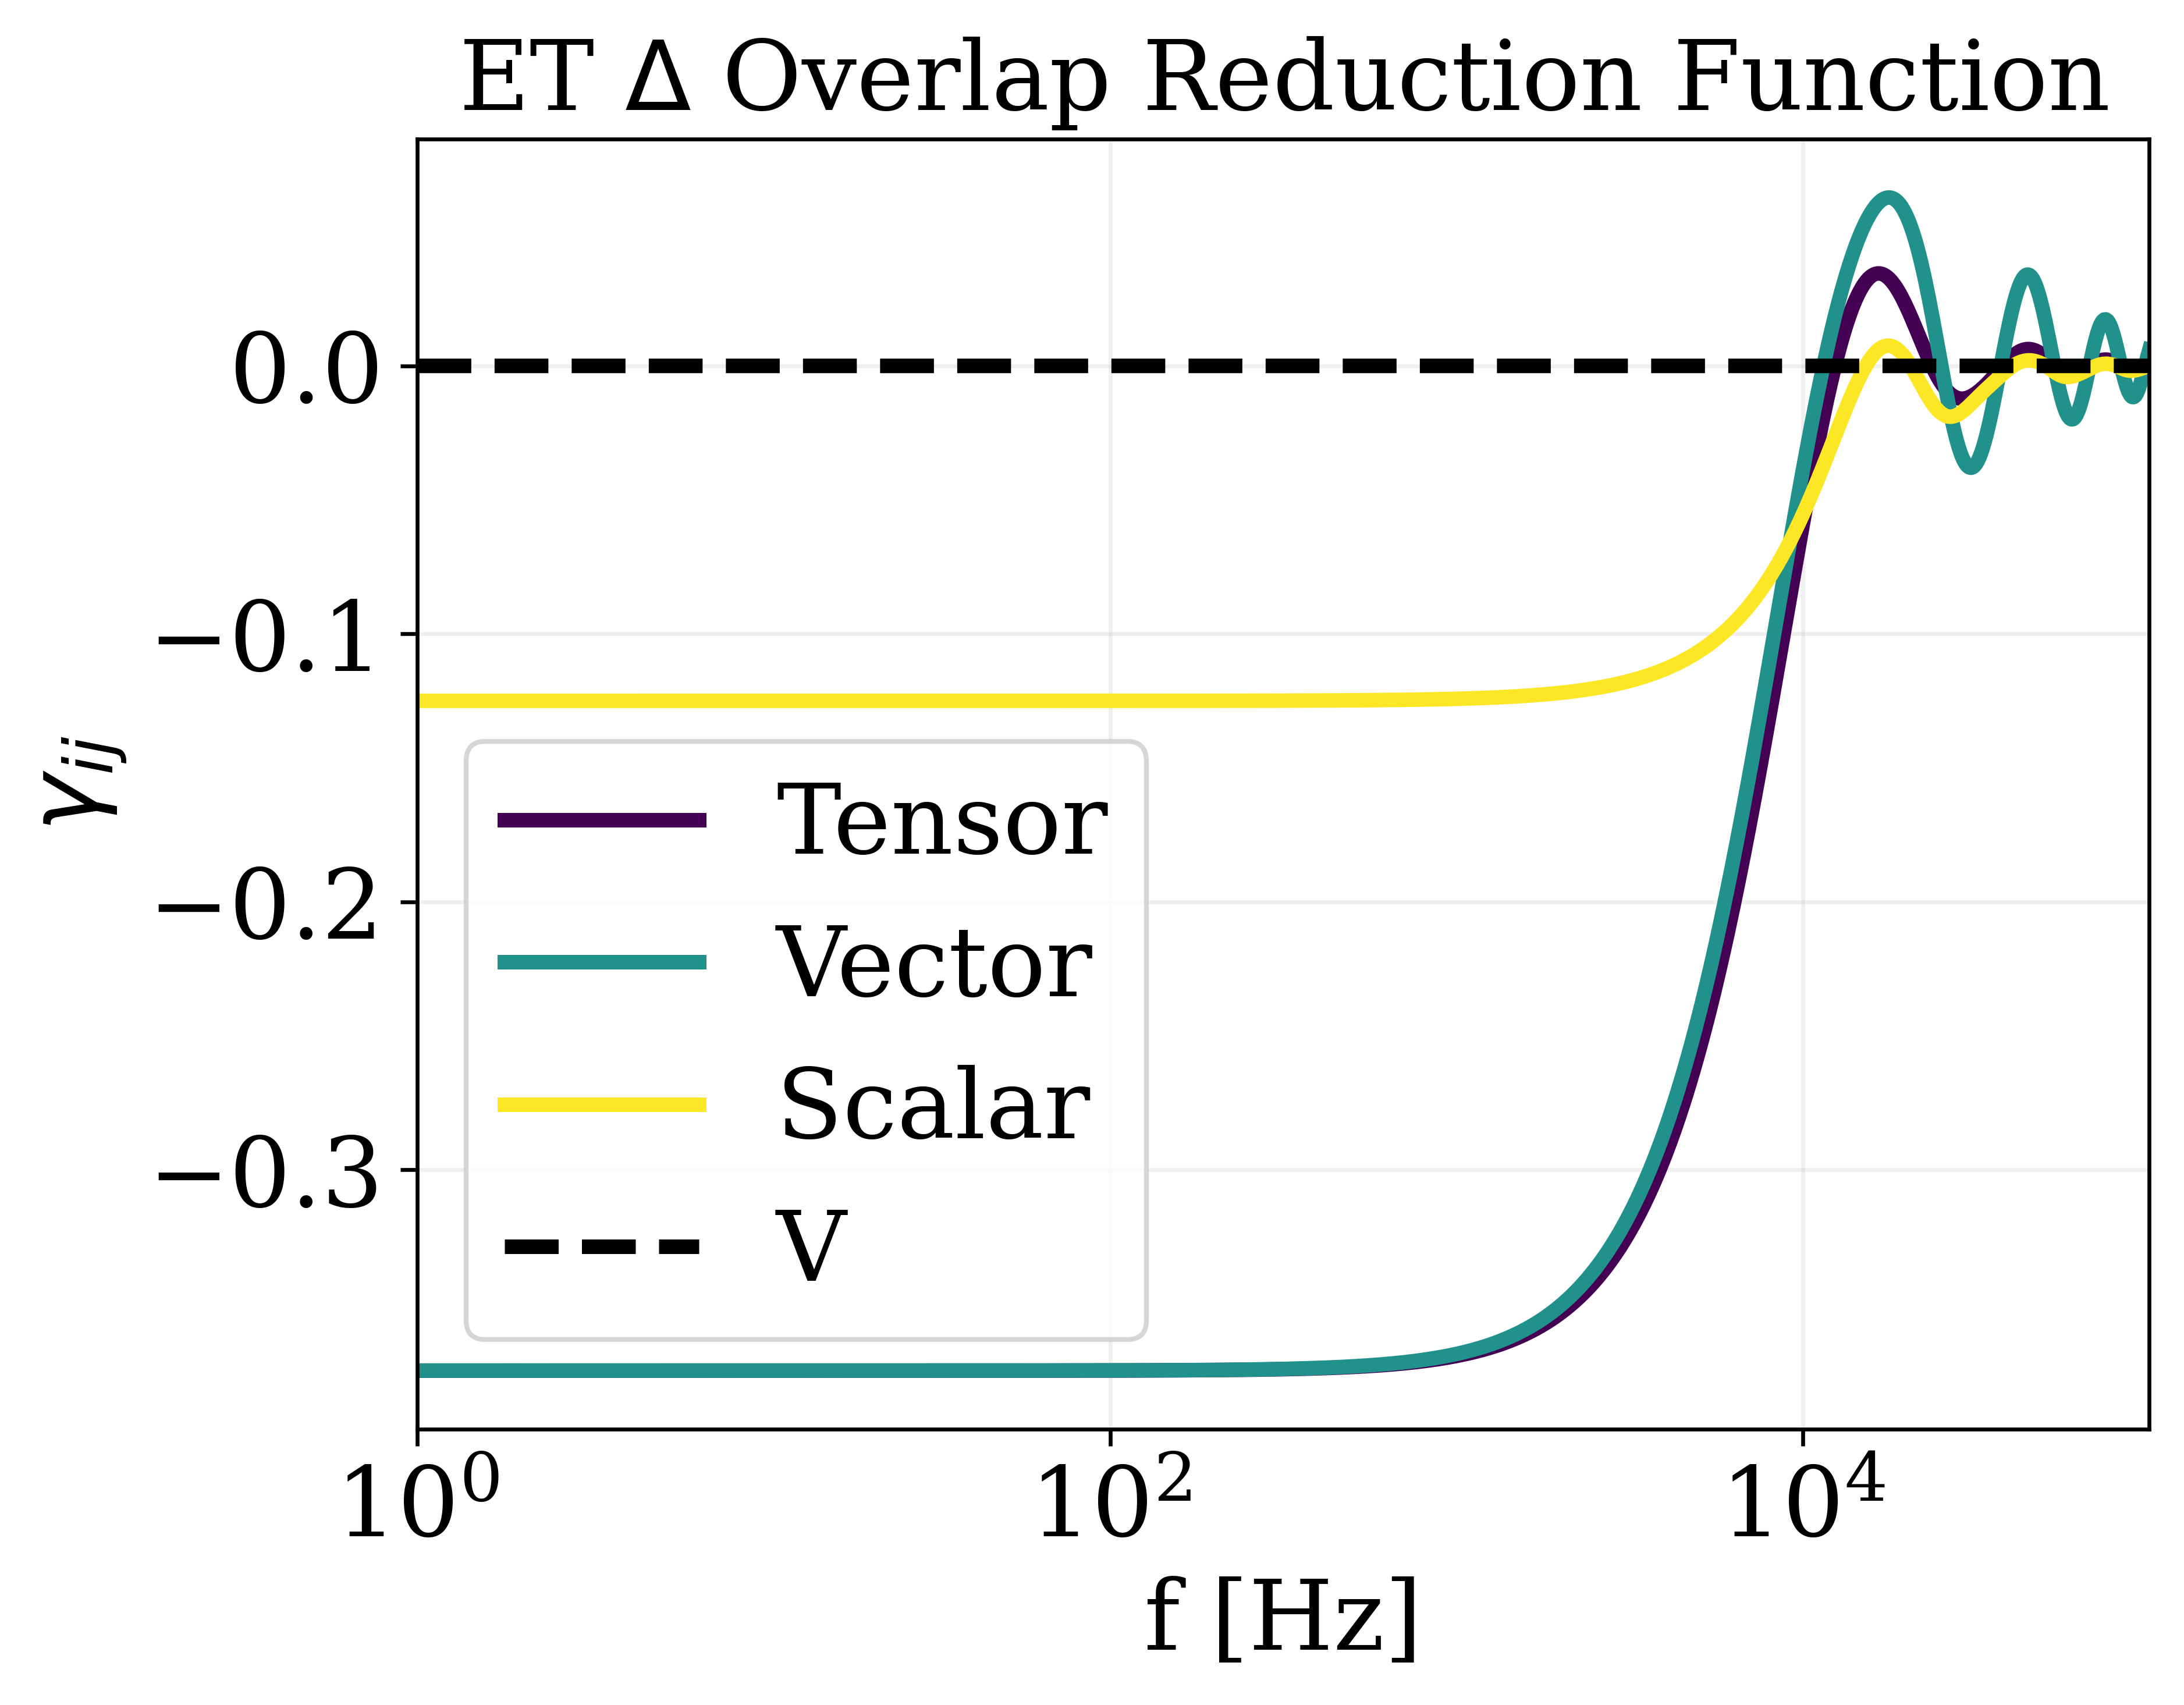

In [114]:
colors = cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, R_t, label='Tensor', color = colors[0], rasterized=True) 
plt.plot(f, R_v, label='Vector', color = colors[1], rasterized=True)
plt.plot(f, R_s, label='Scalar', color = colors[2], rasterized=True)
plt.plot(f, R_V, label='V', color = 'k', linestyle='--', rasterized=True)
plt.xscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}$')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 1e5)
plt.legend(loc='lower left', bbox_to_anchor=(0.0, 0.032)) 
plt.title(r'ET $\Delta$ Overlap Reduction Function')

In [100]:
print(R_t[0]/R_s[0])

2.9997351172328077


Text(0.5, 1.0, 'ET $\\Delta$ response')

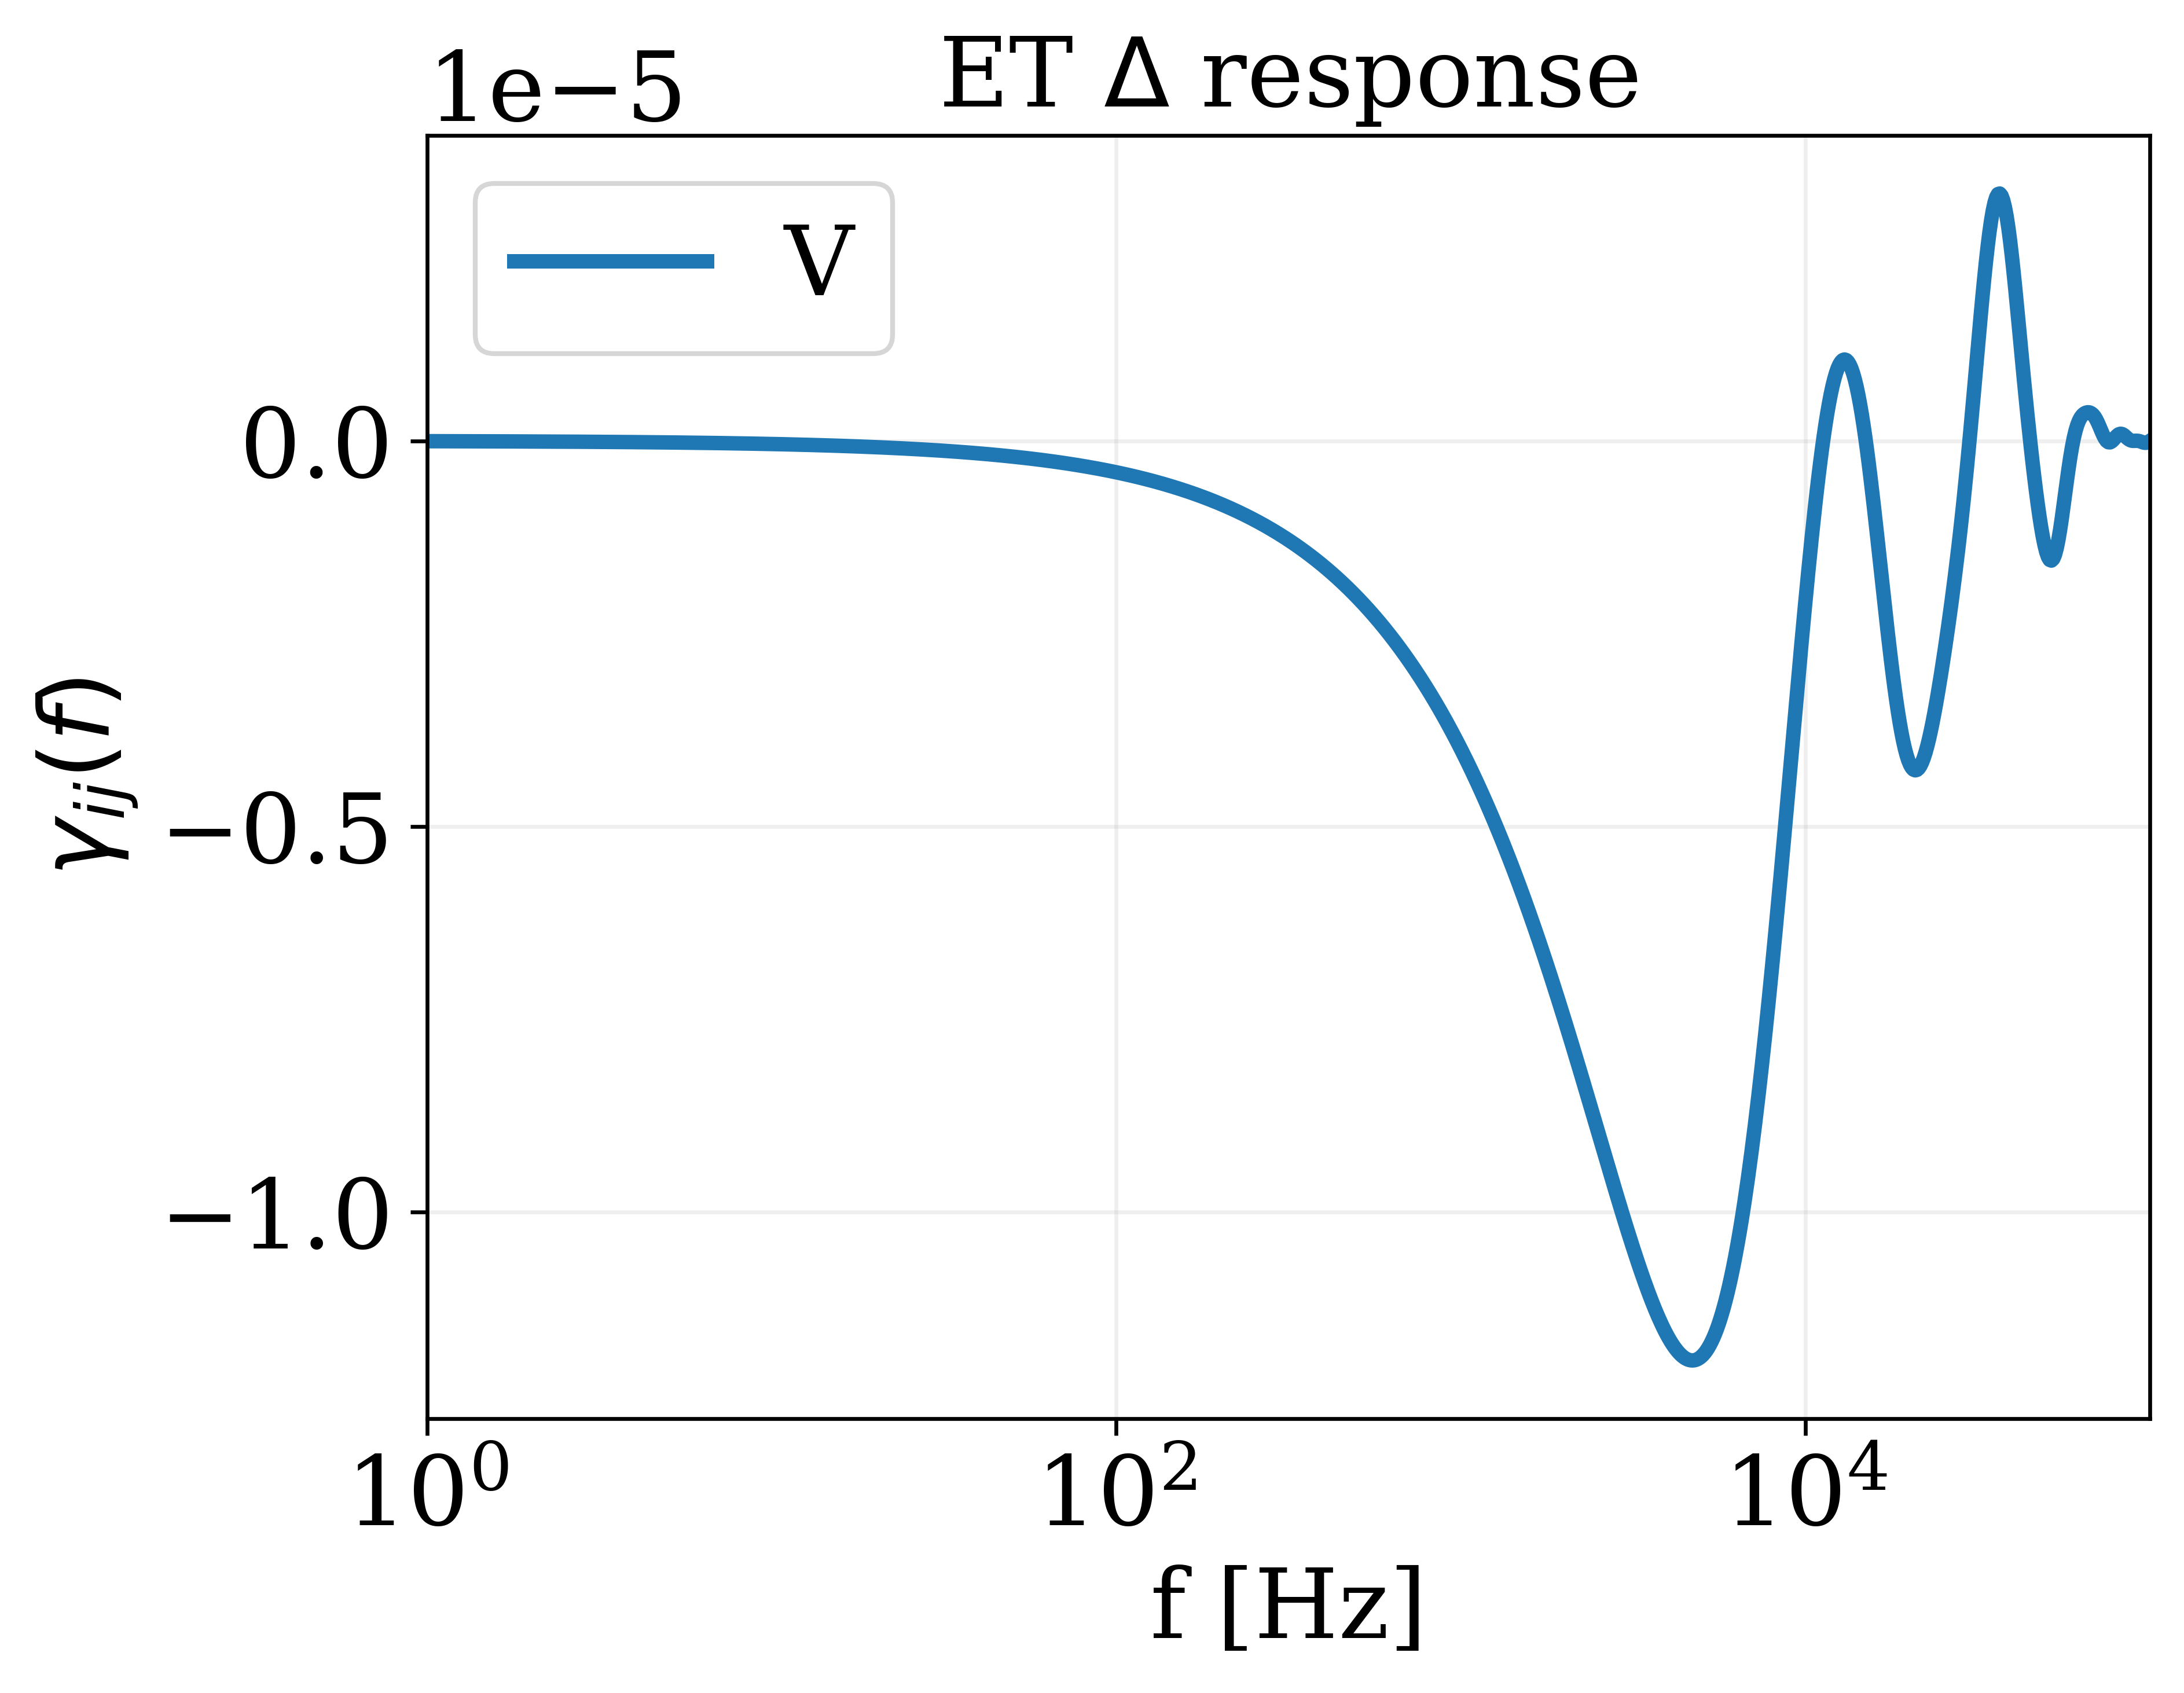

In [101]:
colors = cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, R_V, label='V',  rasterized=True)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\gamma_{ij}(f)$')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 1e5)
plt.legend()
plt.title(r'ET $\Delta$ response')

* Power Law Integrated Sensitivity Curve

Min pls_t: 6.539409653949766e-13 f min: 8.932045998580966
Min pls_v: 6.539629568308346e-13 f min: 8.932045998580966
Min pls_s: 1.961646936517058e-12 f min: 8.932045998580966
Min pls_V: 4.899503309179452e-06 f min: 20.479120966650854


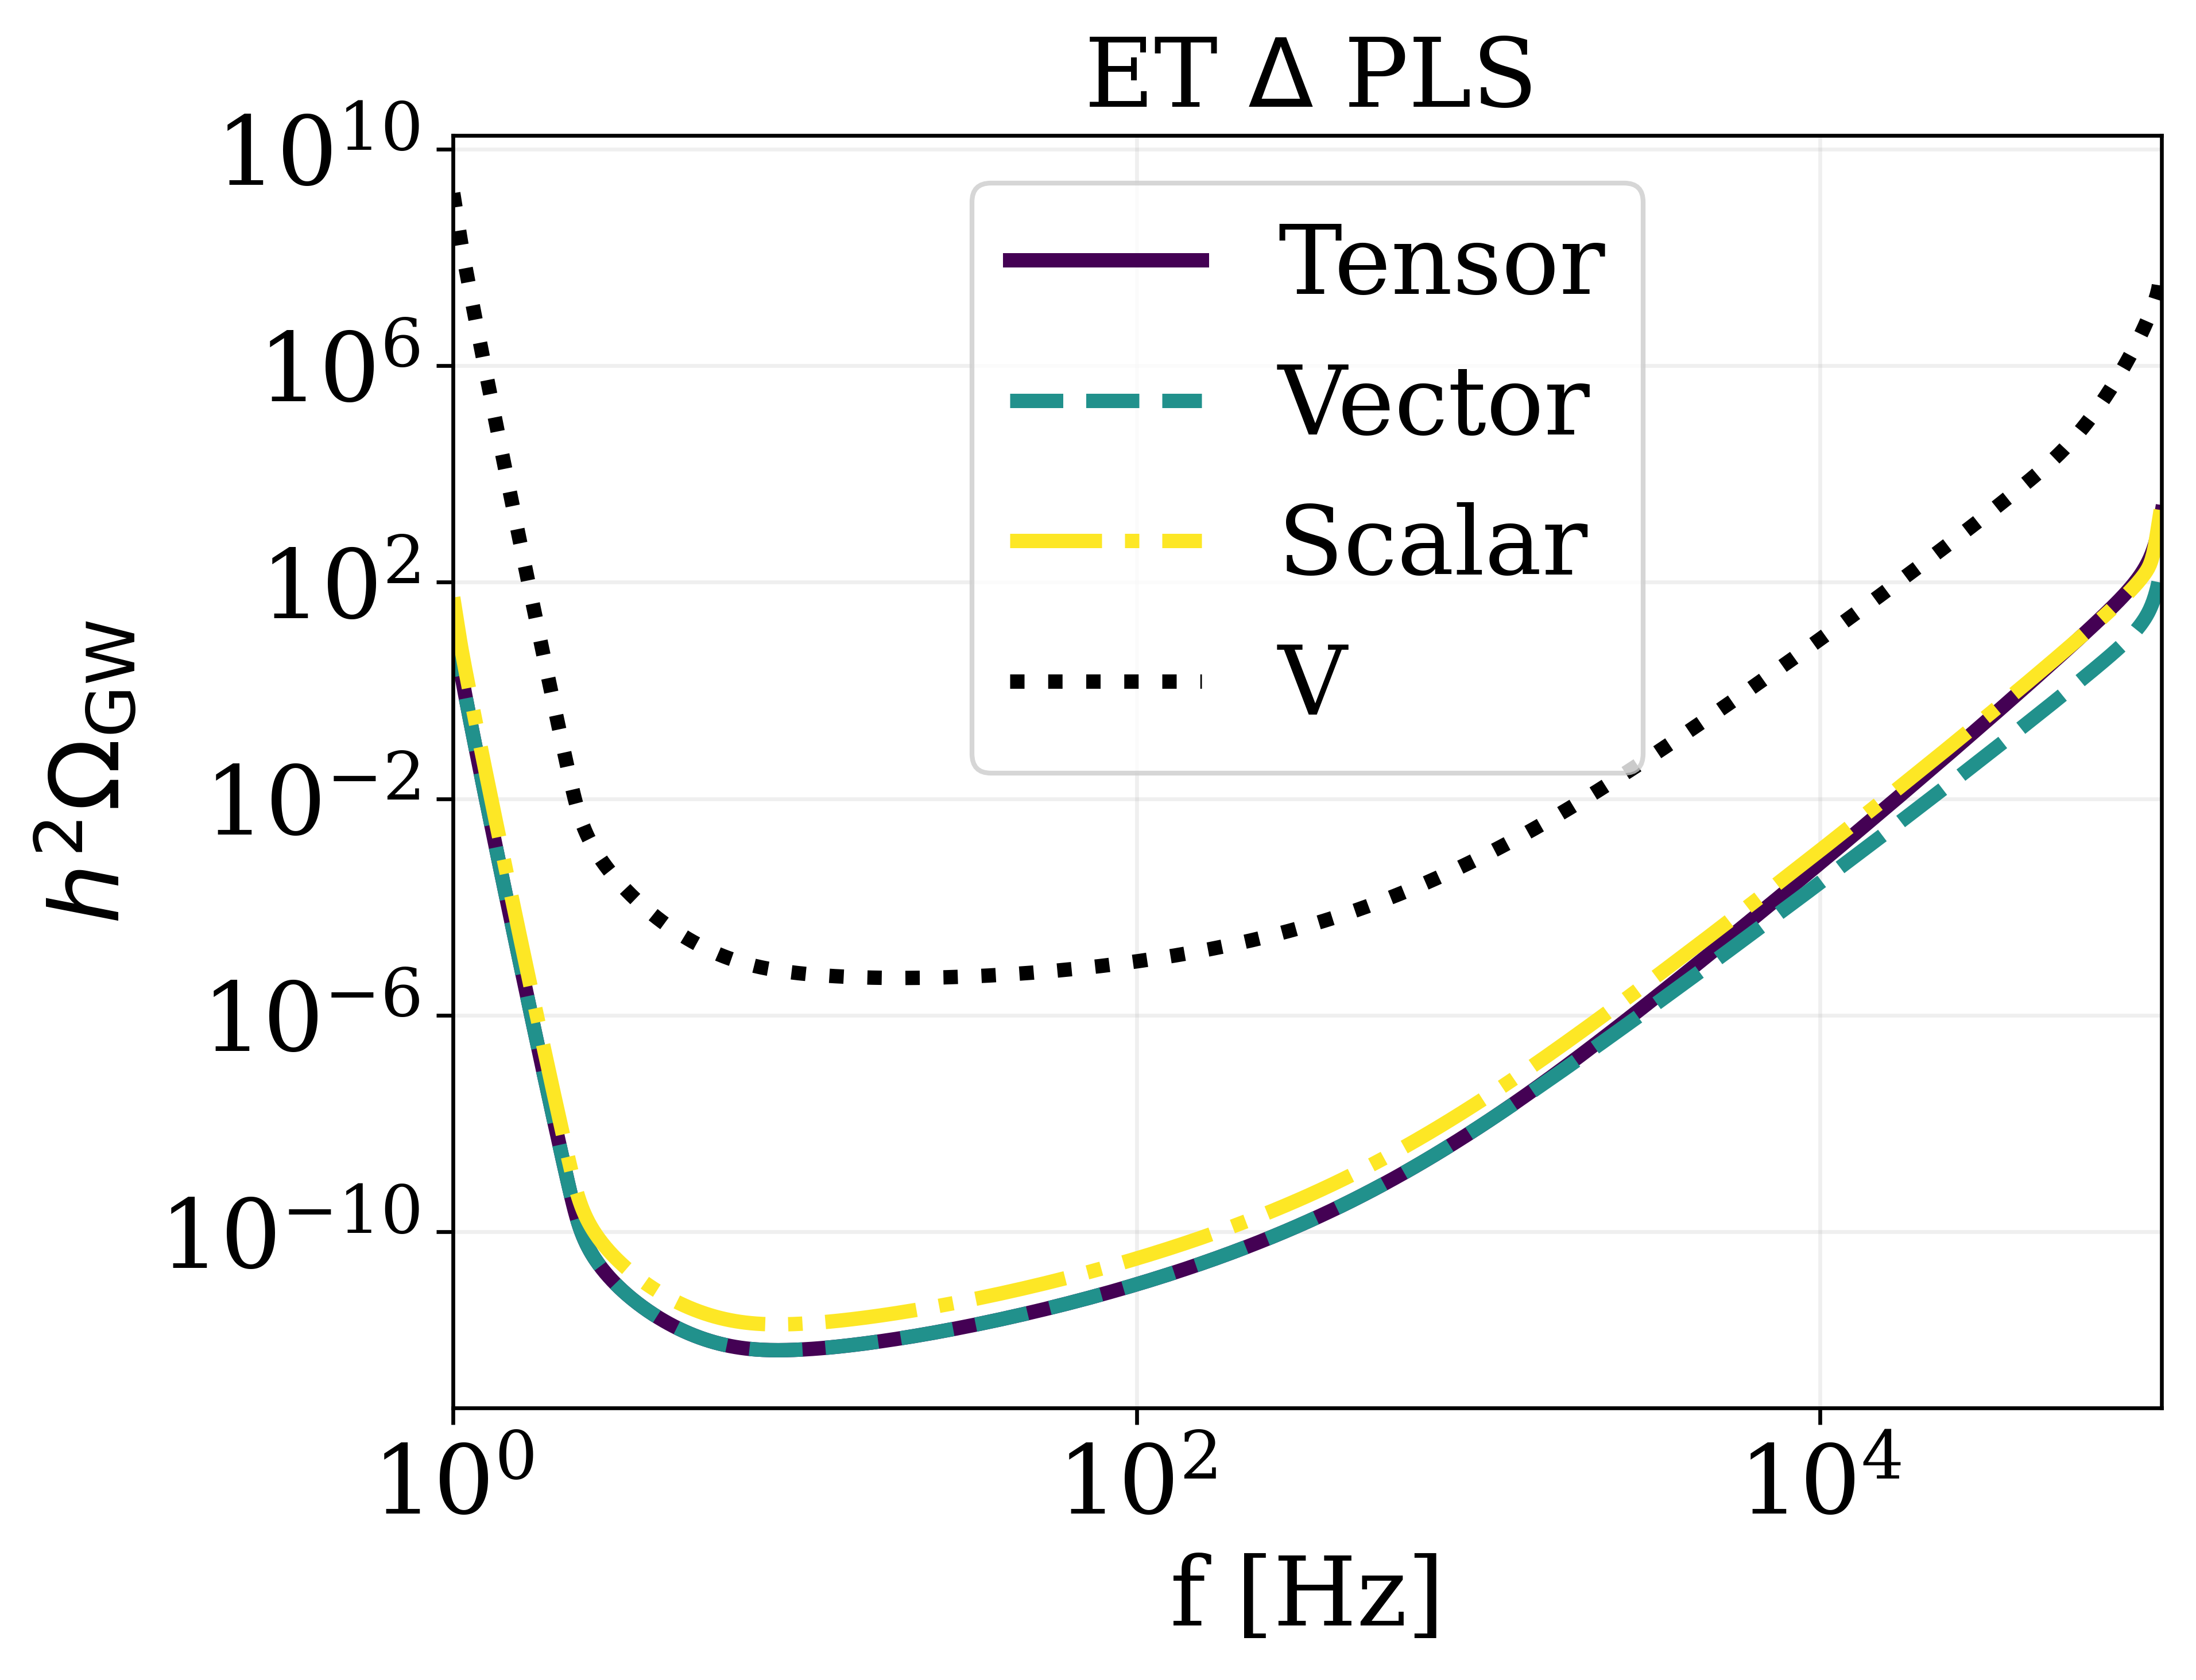

In [102]:
f = np.logspace(0, np.log10(100000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_t = pls.PLS('ET X', 'ET Y', f, fref, 't', snr, Tobs, 0, None)
pls_v = pls.PLS('ET X', 'ET Y', f, fref, 'v', snr, Tobs, 0, None)
pls_s = pls.PLS('ET X', 'ET Y', f, fref, 's', snr, Tobs, 0, None)
pls_V = pls.PLS('ET X', 'ET Y', f, fref, 'V', snr, Tobs, 0, None)

idx_min_t = np.argmin(pls_t)
idx_min_v = np.argmin(pls_v)
idx_min_s = np.argmin(pls_s)
idx_min_V = np.argmin(pls_V)


print("Min pls_t:", pls_t[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s[idx_min_s], "f min:", f[idx_min_s])
print("Min pls_V:", pls_V[idx_min_V], "f min:", f[idx_min_V])

colors = plt.cm.viridis(np.linspace(0, 1, 3))

plt.plot(f, pls_t, label='Tensor', color=colors[0], rasterized=True)
plt.plot(f, pls_v, label='Vector', color=colors[1], linestyle='--', rasterized=True)
plt.plot(f, pls_s, label='Scalar', color=colors[2], linestyle='-.', rasterized=True)
plt.plot(f, pls_V, label='V', color='k', linestyle=':', rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET $\Delta$ PLS')
plt.grid(alpha=0.2, which='both')
plt.xlim(1, 1e5)
plt.legend()

* Angular Response

In [103]:
f = np.logspace(0, np.log10(100000), 1000)

print('Calculating Angular response for the monopole...')   
print('- tensor modes')
R0_t = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R0_v = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R0_s = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R0_V = AngularResponse.R_ell(0, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the dipole...')   
print('- tensor modes')
R1_t = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R1_v = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R1_s = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R1_V = AngularResponse.R_ell(1, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the quadrupole...')   
print('- tensor modes')
R2_t = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R2_v = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R2_s = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R2_V = AngularResponse.R_ell(2, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)

print('Calculating Angular response for the octupole...')   
print('- tensor modes')
R3_t = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 't', 0, shift_angle=None)
print('- vector modes')
R3_v = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 'v', 0, shift_angle=None)
print('- scalar modes')
R3_s = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 's', 0, shift_angle=None)
print('- V')
R3_V = AngularResponse.R_ell(3, 'ET X', 'ET Y', f, 'V', 0, shift_angle=None)


Calculating Angular response for the monopole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the dipole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the quadrupole...
- tensor modes
- vector modes
- scalar modes
- V
Calculating Angular response for the octupole...
- tensor modes
- vector modes
- scalar modes
- V


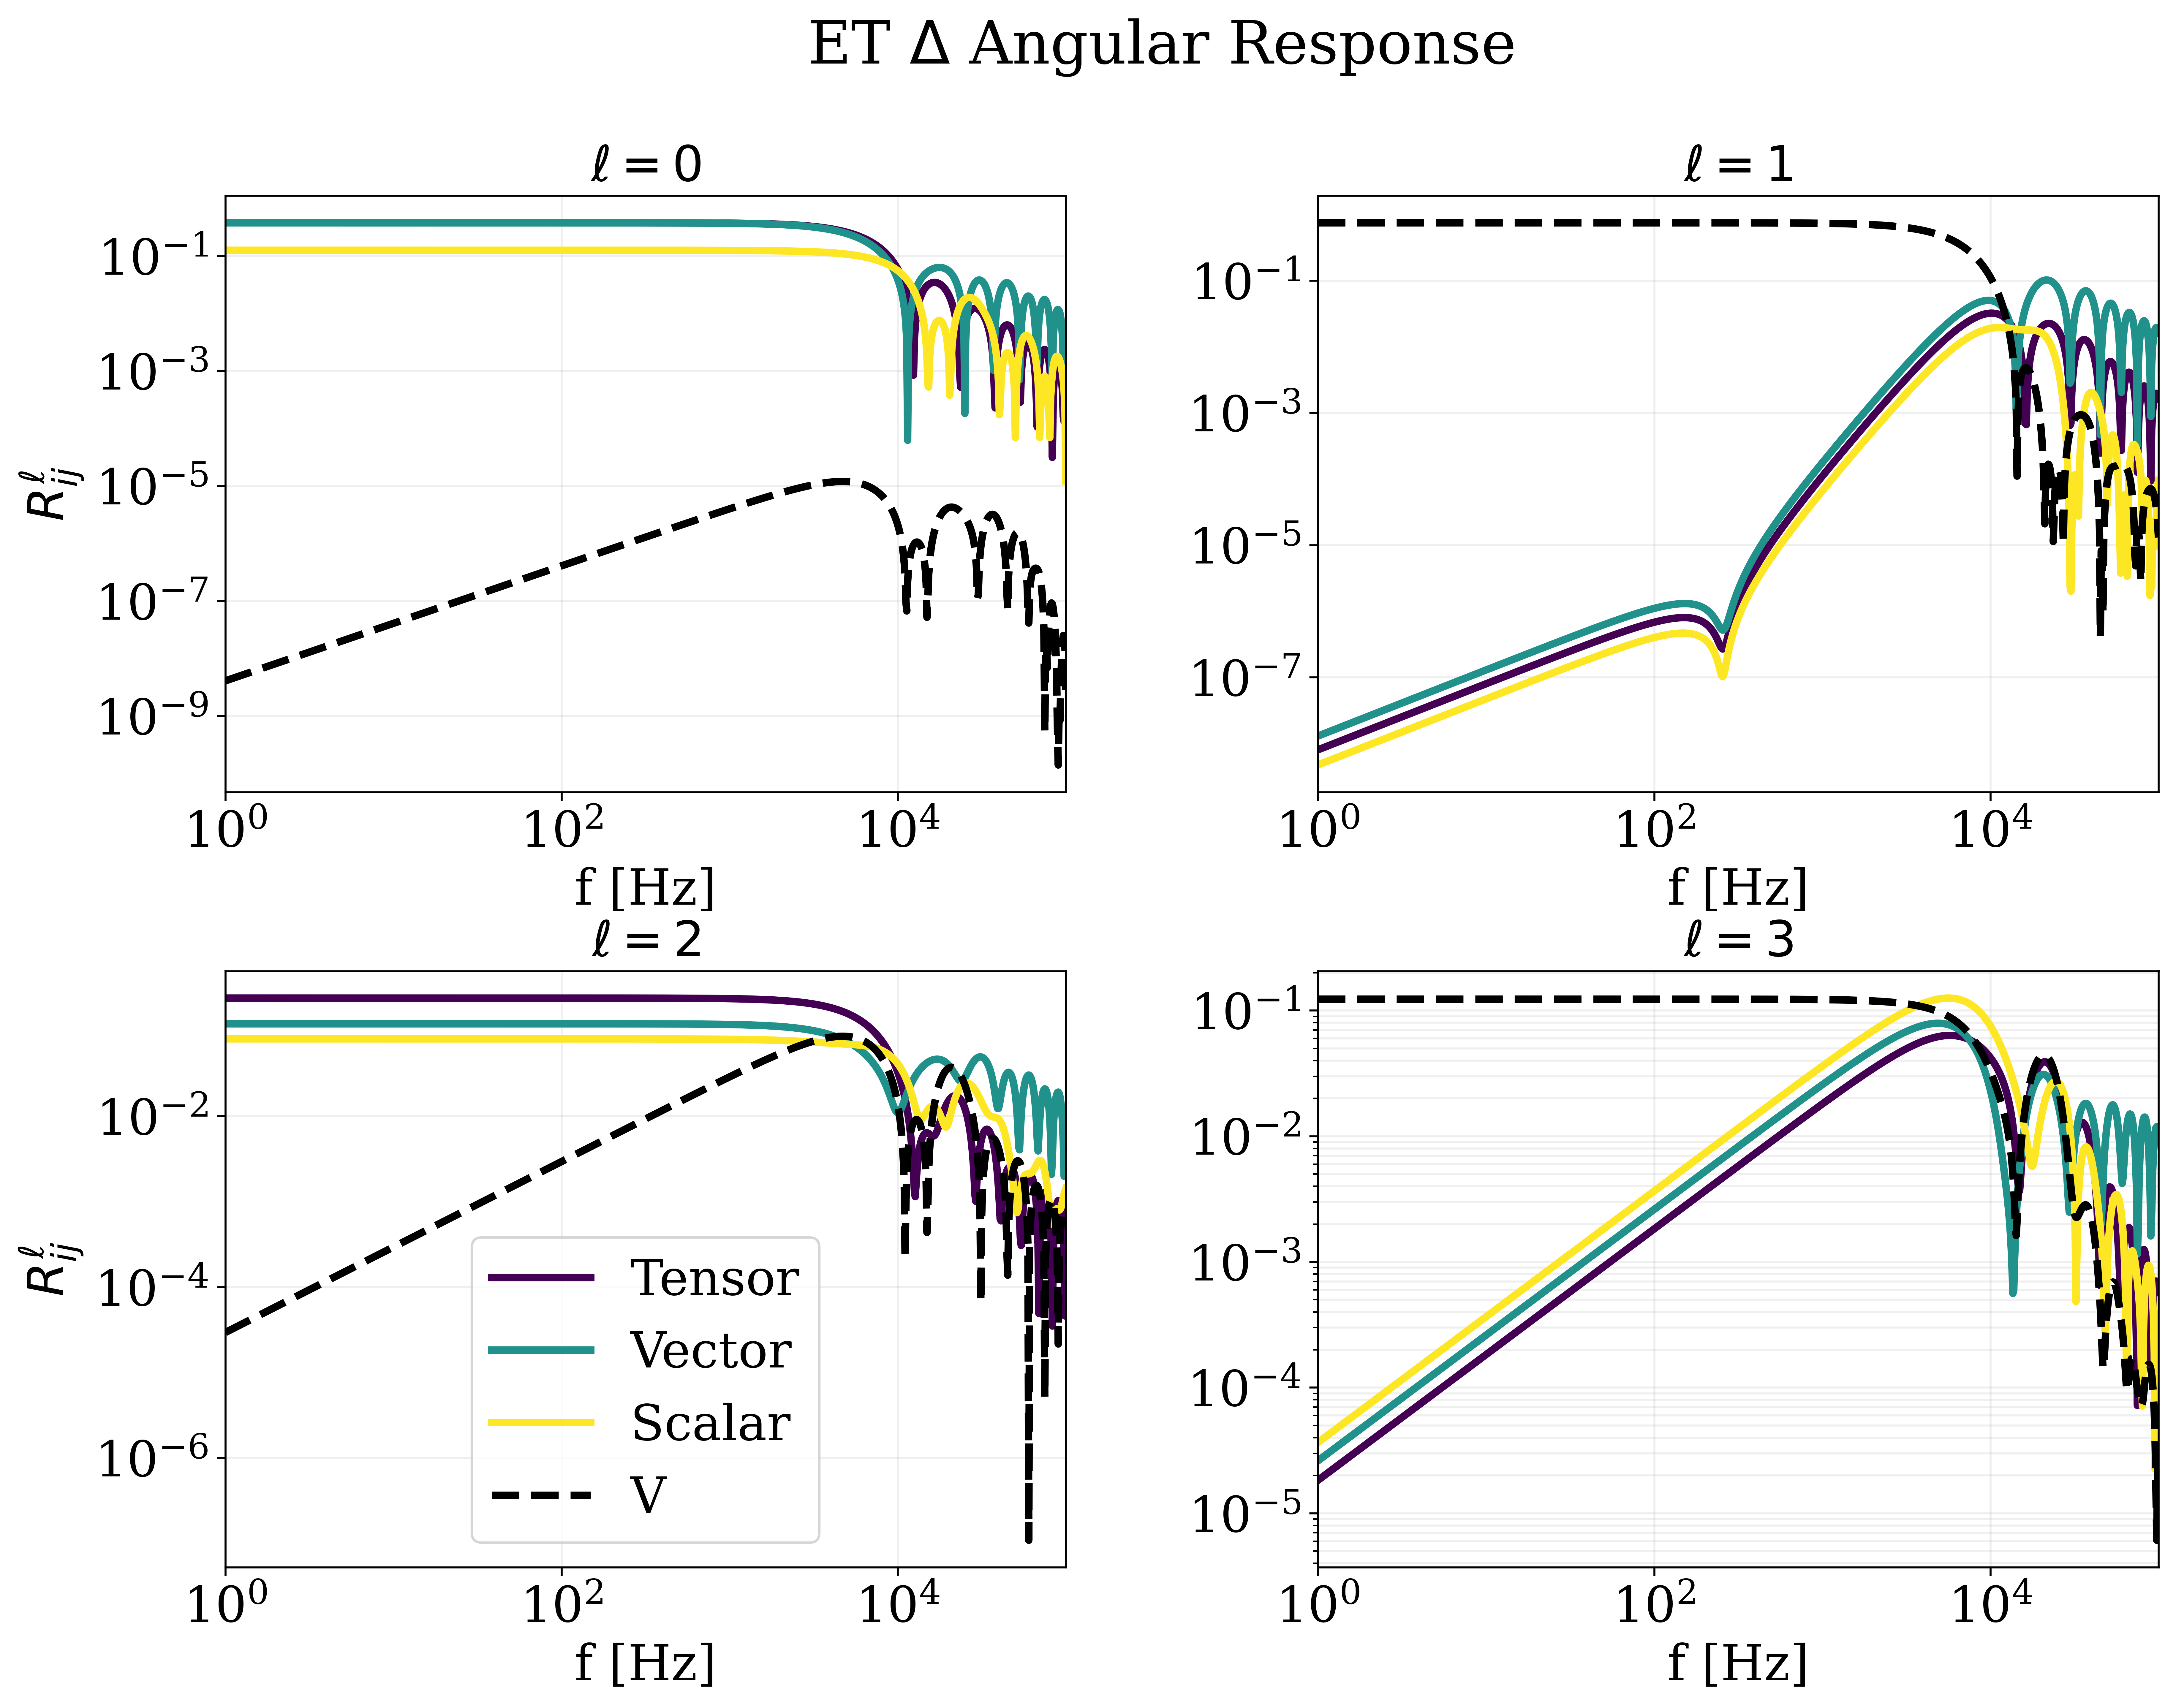

In [104]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10), gridspec_kw={'wspace': 0.3, 'hspace': 0.3})


# monopole
axs[0, 0].plot(f, R0_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 0].plot(f, R0_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 0].plot(f, R0_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 0].plot(f, R0_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 0].set_xscale('log')
axs[0, 0].set_yscale('log')
axs[0, 0].set_xlabel('f [Hz]')
axs[0, 0].set_ylabel(r'$R_{ij}^{\ell}$')
#axs[0, 0].legend()
axs[0, 0].grid(alpha=0.2, which='both')
axs[0, 0].set_xlim(1, 1e5)
axs[0, 0].set_title(r'$\ell = 0$')

# dipole
axs[0, 1].plot(f, R1_t, label='Tensor', color=colors[0], rasterized=True)
axs[0, 1].plot(f, R1_v, label='Vector', color=colors[1], rasterized=True)
axs[0, 1].plot(f, R1_s, label='Scalar', color=colors[2], rasterized=True)
axs[0, 1].plot(f, R1_V, label='V', color='k', linestyle='--', rasterized=True)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xlabel('f [Hz]')
#axs[0, 1].legend()
axs[0, 1].grid(alpha=0.2, which='both')
axs[0, 1].set_xlim(1, 1e5)
axs[0, 1].set_title(r'$\ell = 1$')

# quadrupole
axs[1, 0].plot(f, R2_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 0].plot(f, R2_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 0].plot(f, R2_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 0].plot(f, R2_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('f [Hz]')
axs[1, 0].set_ylabel(r'$R_{ij}^{\ell}$')
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.2, which='both')
axs[1, 0].set_xlim(1, 1e5)
axs[1, 0].set_title(r'$\ell = 2$')

# octupole
axs[1, 1].plot(f, R3_t, label='Tensor', color=colors[0], rasterized=True)
axs[1, 1].plot(f, R3_v, label='Vector', color=colors[1], rasterized=True)
axs[1, 1].plot(f, R3_s, label='Scalar', color=colors[2], rasterized=True)
axs[1, 1].plot(f, R3_V, label='V', color='k', linestyle='--', rasterized=True)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('f [Hz]')
#axs[1, 1].legend()
axs[1, 1].grid(alpha=0.2, which='both')
axs[1, 1].set_xlim(1, 1e5)
axs[1, 1].set_title(r'$\ell = 3$')

# Imposta il titolo principale
fig.suptitle(r'ET $\Delta$ Angular Response')

plt.show()

* Sensitivity curver for the multipoles


Min pls_0_t: 6.539409653949765e-13 f min: 8.932045998580966
Min pls_1_t: 8.142047463287317e-05 f min: 19.332422875550453
Min pls_2_t: 3.23668825041825e-11 f min: 8.932045998580966
Min pls_3_t: 3.454122858373957e-08 f min: 20.479120966650854


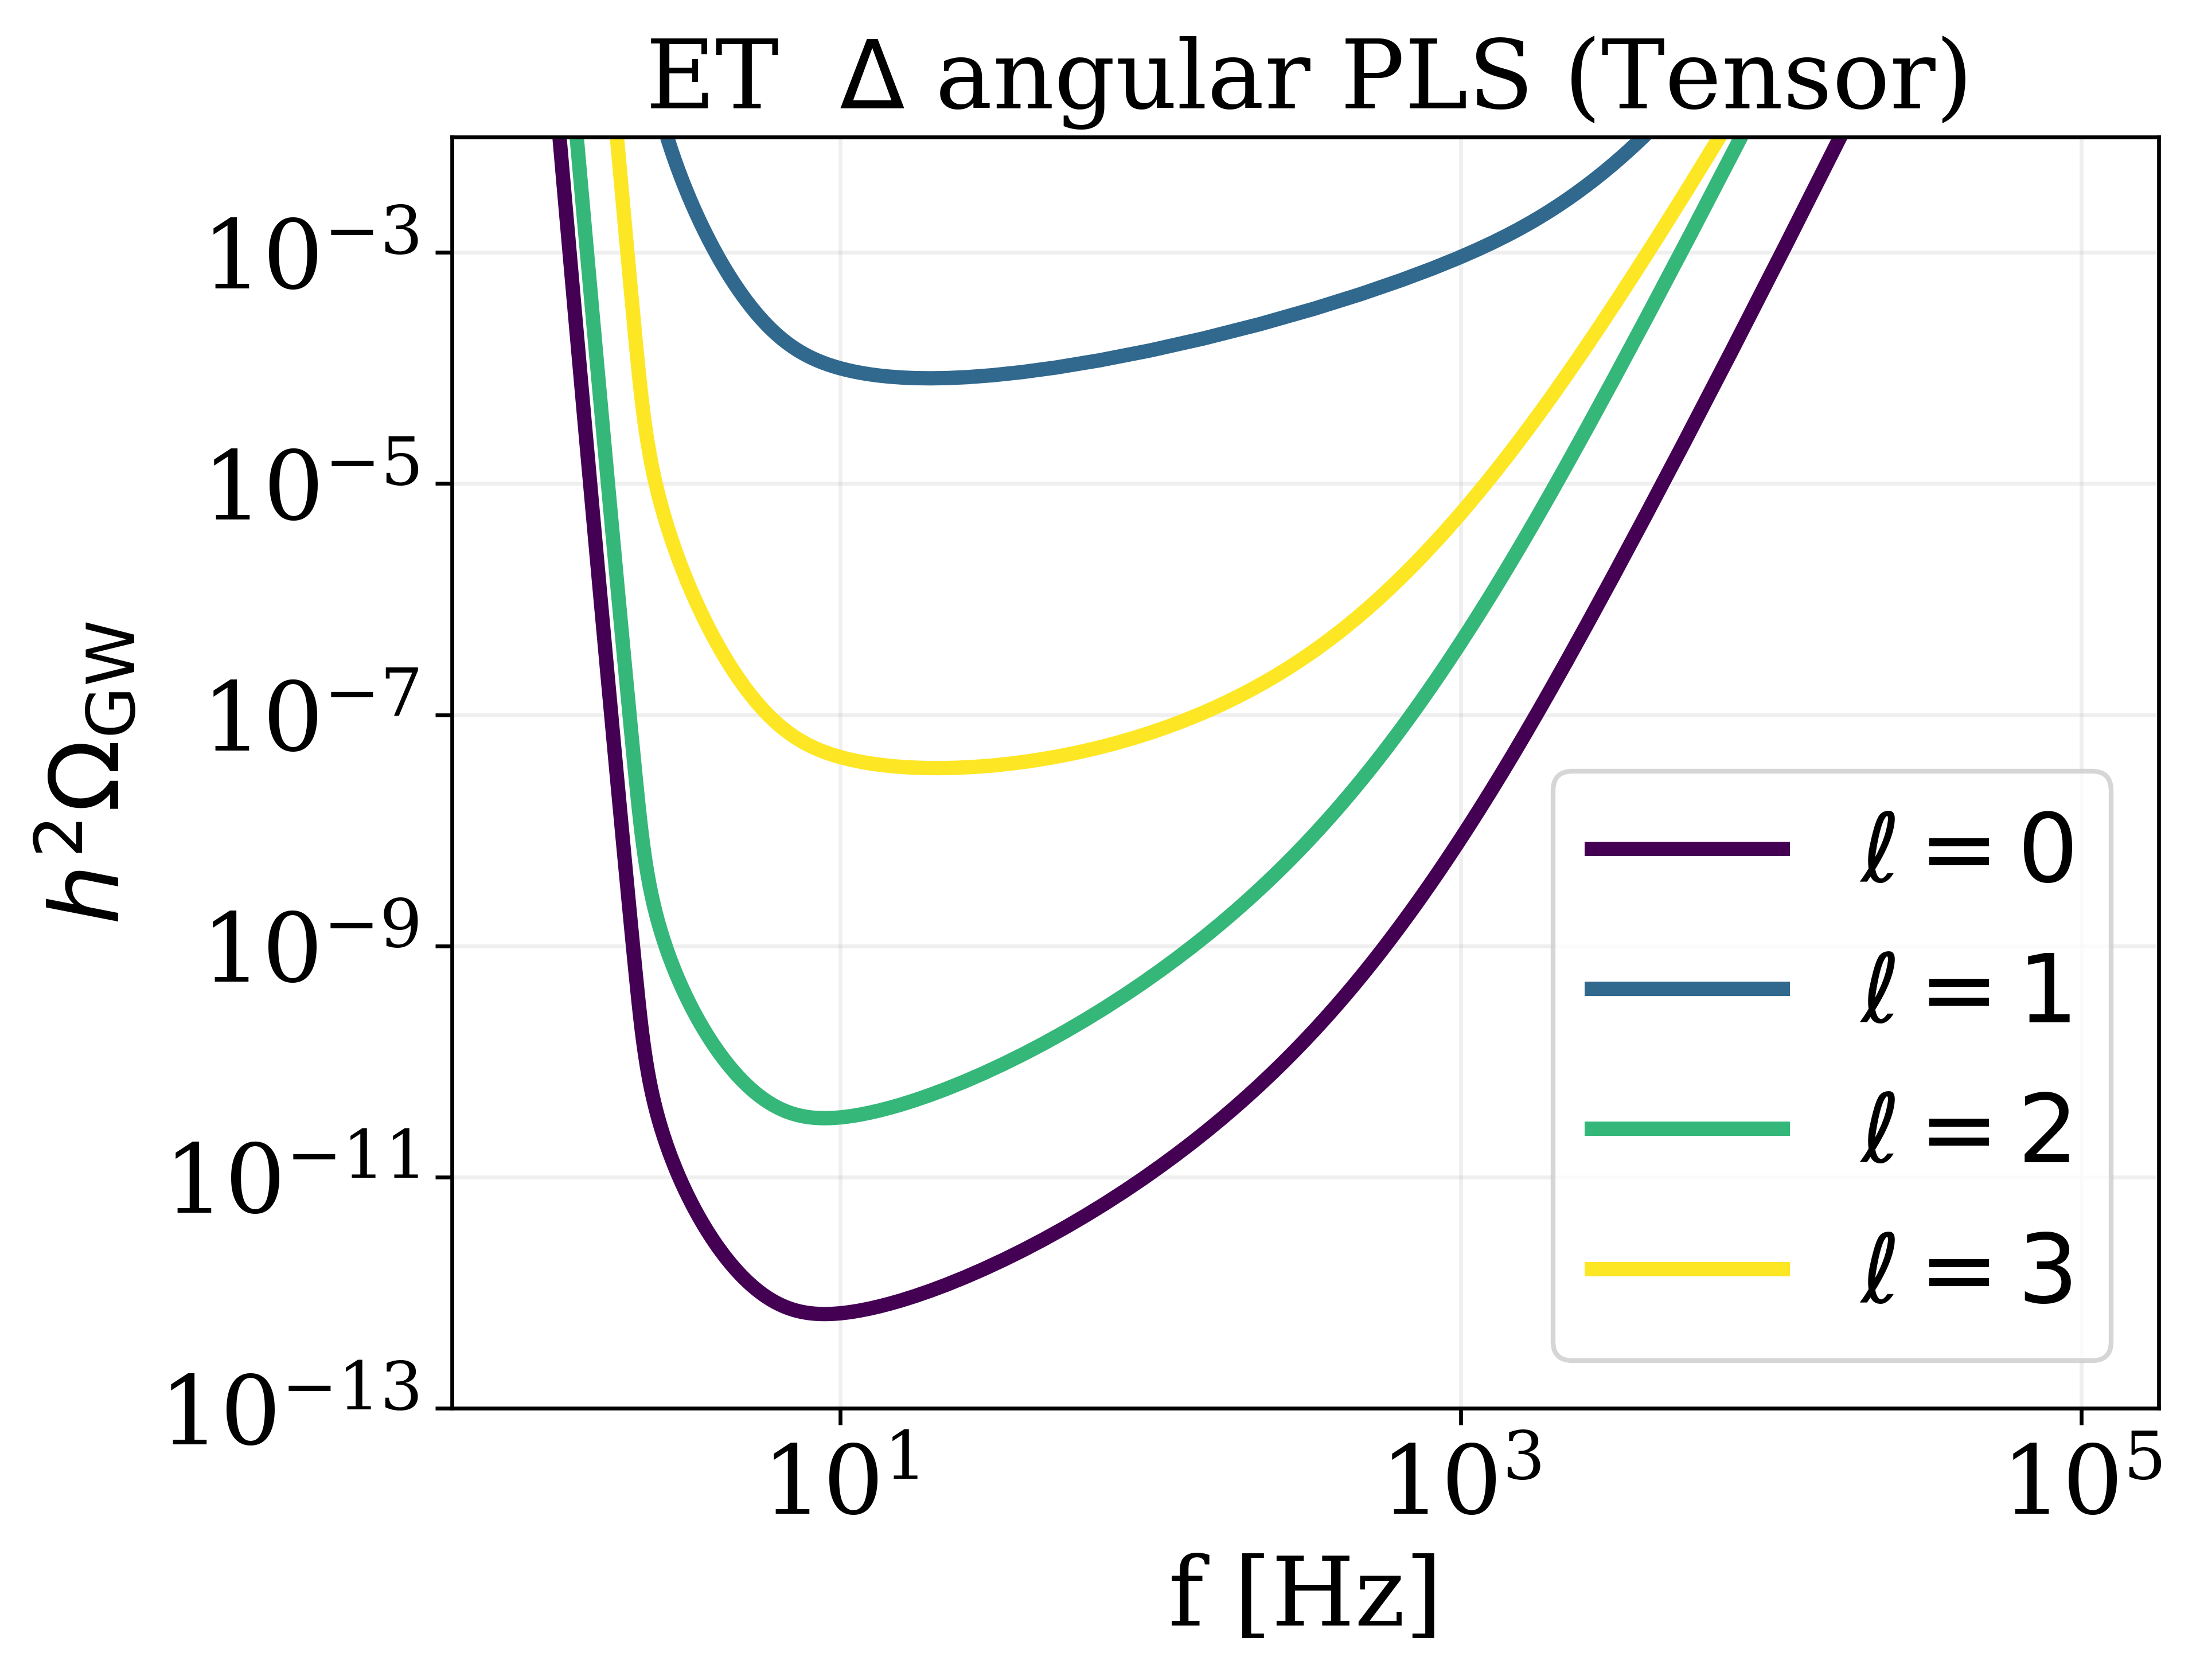

In [105]:
pls0_t = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 0, f, 't', 0, fref, snr, Tobs, 1)
pls1_t = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 1, f, 't', 0, fref, snr, Tobs,  1e-3)
pls2_t = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 2, f, 't', 0, fref, snr, Tobs,  1e-3)
pls3_t = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 3, f, 't', 0, fref, snr, Tobs,  1e-3)

idx_min_0_t = np.argmin(pls0_t)
idx_min_1_t = np.argmin(pls1_t)
idx_min_2_t = np.argmin(pls2_t)
idx_min_3_t = np.argmin(pls3_t)

print("Min pls_0_t:", pls0_t[idx_min_0_t], "f min:", f[idx_min_0_t])
print("Min pls_1_t:", pls1_t[idx_min_1_t], "f min:", f[idx_min_1_t])
print("Min pls_2_t:", pls2_t[idx_min_2_t], "f min:", f[idx_min_2_t])
print("Min pls_3_t:", pls3_t[idx_min_3_t], "f min:", f[idx_min_3_t])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_t, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_t, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_t, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_t, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{ \rm GW}$')
plt.title(r'ET  $\Delta$ angular PLS (Tensor)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_v: 6.539629568308345e-13 f min: 8.932045998580966
Min pls_1_v: 5.034770118188533e-05 f min: 19.332422875550453
Min pls_2_v: 6.472392982641906e-11 f min: 8.932045998580966
Min pls_3_v: 2.4172971506181855e-08 f min: 20.479120966650854


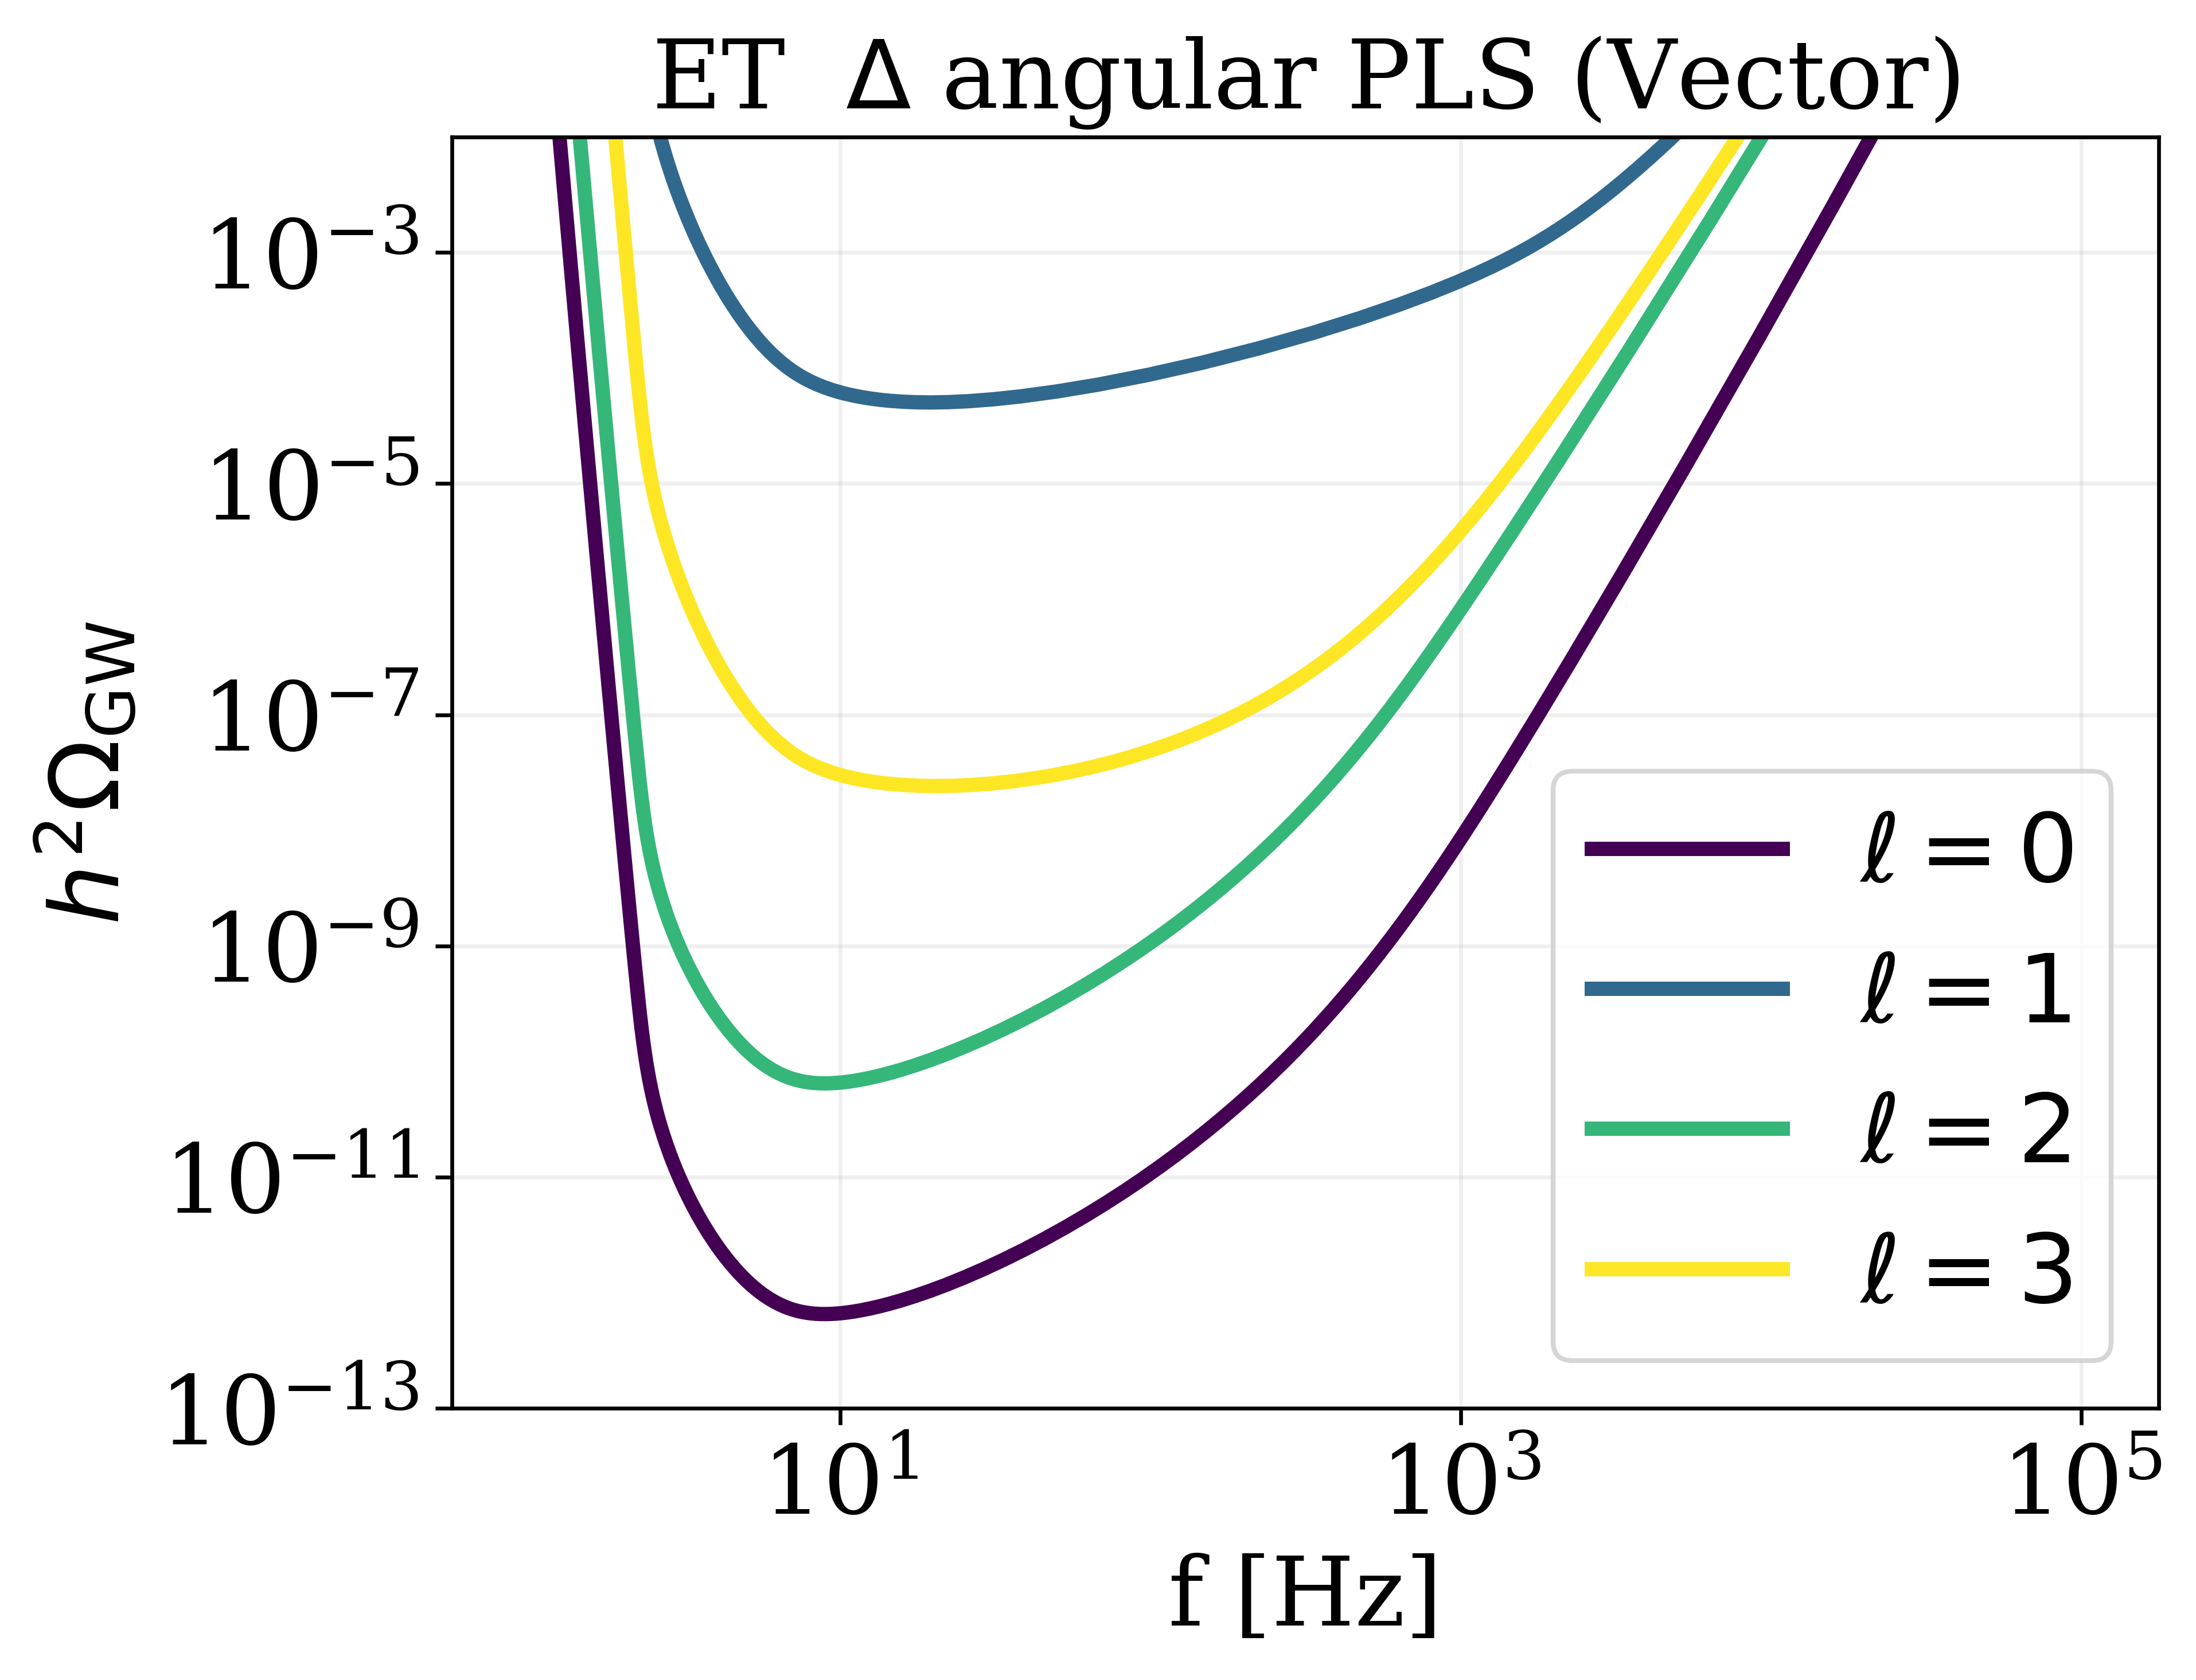

In [106]:
# vector modes

pls0_v = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 0, f, 'v', 0, fref, snr, Tobs, 1)
pls1_v = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 1, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls2_v = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 2, f, 'v', 0, fref, snr, Tobs,  1e-3)
pls3_v = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 3, f, 'v', 0,fref, snr, Tobs,  1e-3)


idx_min_0_v = np.argmin(pls0_v)
idx_min_1_v = np.argmin(pls1_v)
idx_min_2_v = np.argmin(pls2_v)
idx_min_3_v = np.argmin(pls3_v)


print("Min pls_0_v:", pls0_v[idx_min_0_v], "f min:", f[idx_min_0_v])
print("Min pls_1_v:", pls1_v[idx_min_1_v], "f min:", f[idx_min_1_v])
print("Min pls_2_v:", pls2_v[idx_min_2_v], "f min:", f[idx_min_2_v])
print("Min pls_3_v:", pls3_v[idx_min_3_v], "f min:", f[idx_min_3_v])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_v, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_v, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_v, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_v, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET  $\Delta$ angular PLS (Vector)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_s: 1.961646936517058e-12 f min: 8.932045998580966
Min pls_1_s: 0.00013807389919044647 f min: 19.332422875550453
Min pls_2_s: 9.70966661385511e-11 f min: 8.932045998580966
Min pls_3_s: 1.7270614892859275e-08 f min: 20.479120966650854


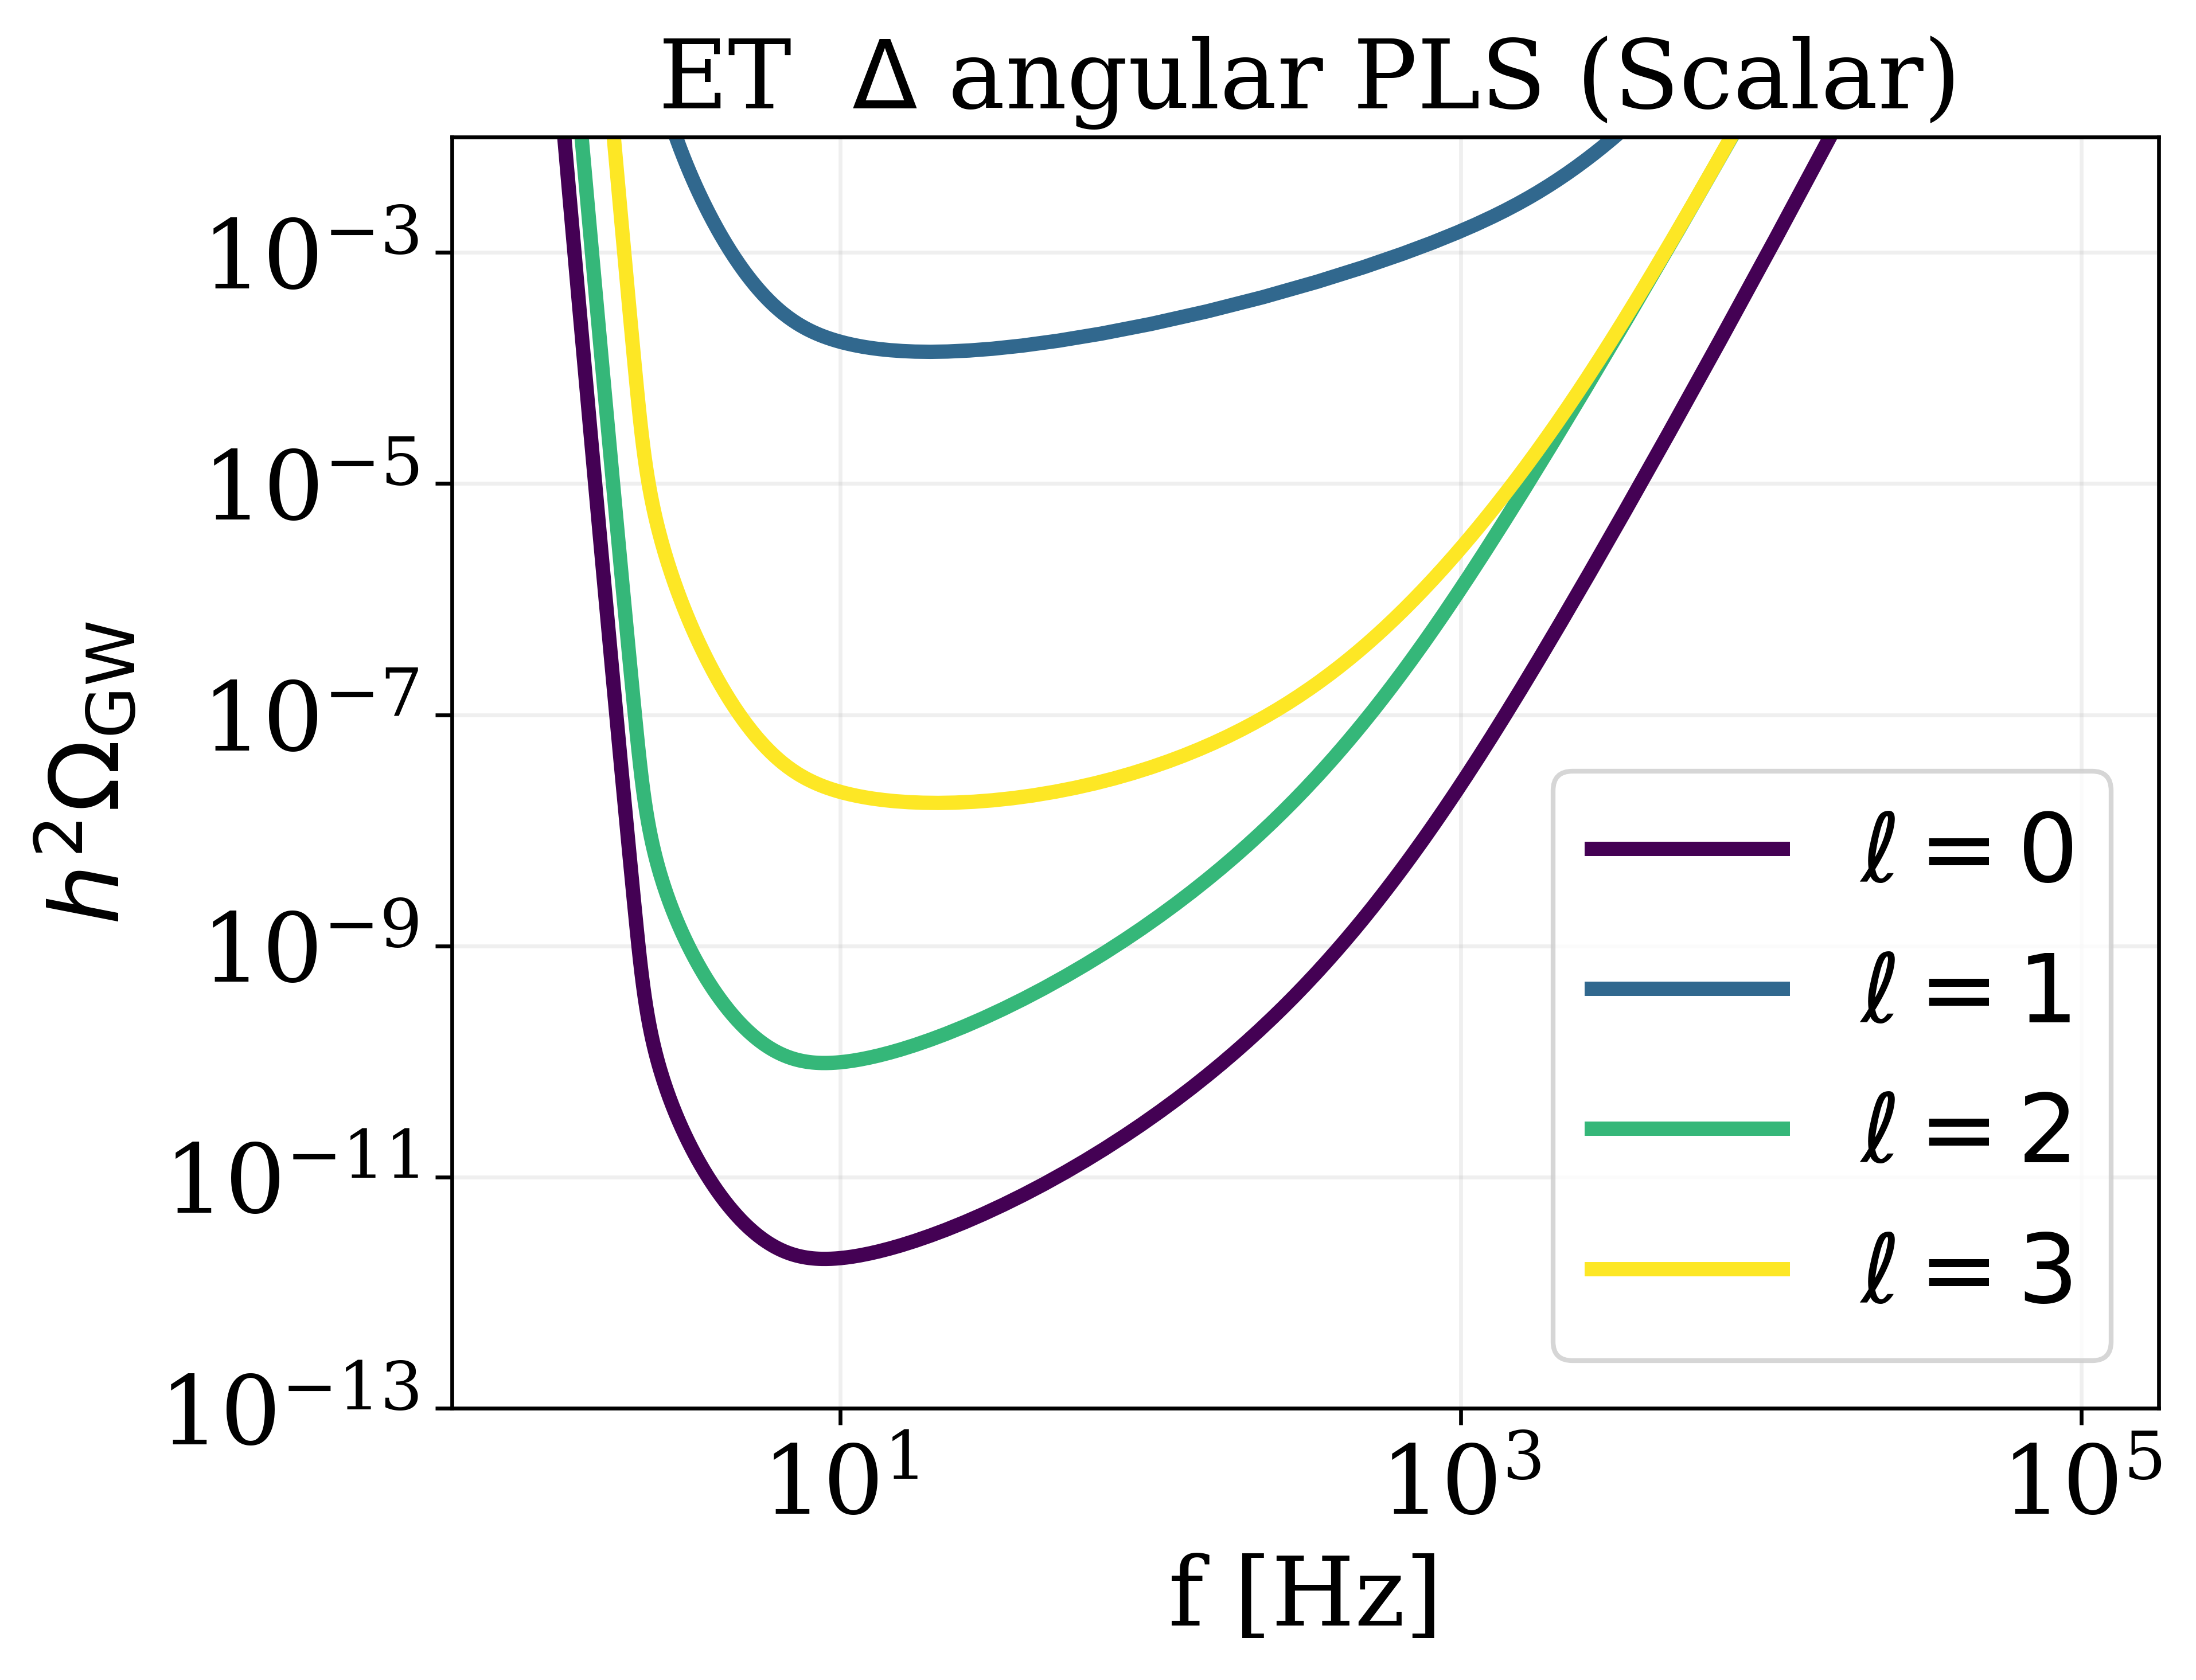

In [107]:
# scalar modes

pls0_s = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 0, f, 's', 0, fref, snr, Tobs, 1)
pls1_s = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 1, f, 's', 0, fref, snr, Tobs,  1e-3)
pls2_s = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 2, f, 's', 0, fref, snr, Tobs,  1e-3)
pls3_s = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 3, f, 's', 0, fref, snr, Tobs,  1e-3)

idx_min_0_s = np.argmin(pls0_s)
idx_min_1_s = np.argmin(pls1_s)
idx_min_2_s = np.argmin(pls2_s)
idx_min_3_s = np.argmin(pls3_s)


print("Min pls_0_s:", pls0_s[idx_min_0_s], "f min:", f[idx_min_0_s])
print("Min pls_1_s:", pls1_s[idx_min_1_s], "f min:", f[idx_min_1_s])
print("Min pls_2_s:", pls2_s[idx_min_2_s], "f min:", f[idx_min_2_s])
print("Min pls_3_s:", pls3_s[idx_min_3_s], "f min:", f[idx_min_3_s])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_s, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_s, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_s, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_s, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET  $\Delta$ angular PLS (Scalar)')
plt.ylim(1e-13, 1e-2)
plt.grid(alpha=0.2, which='both')
plt.legend()

Min pls_0_V: 4.899503309179448e-06 f min: 20.479120966650854
Min pls_1_V: 1.0339689999991992e-11 f min: 8.932045998580966
Min pls_2_V: 2.1537170237054238e-08 f min: 20.479120966650854
Min pls_3_V: 6.314560452459277e-11 f min: 8.932045998580966


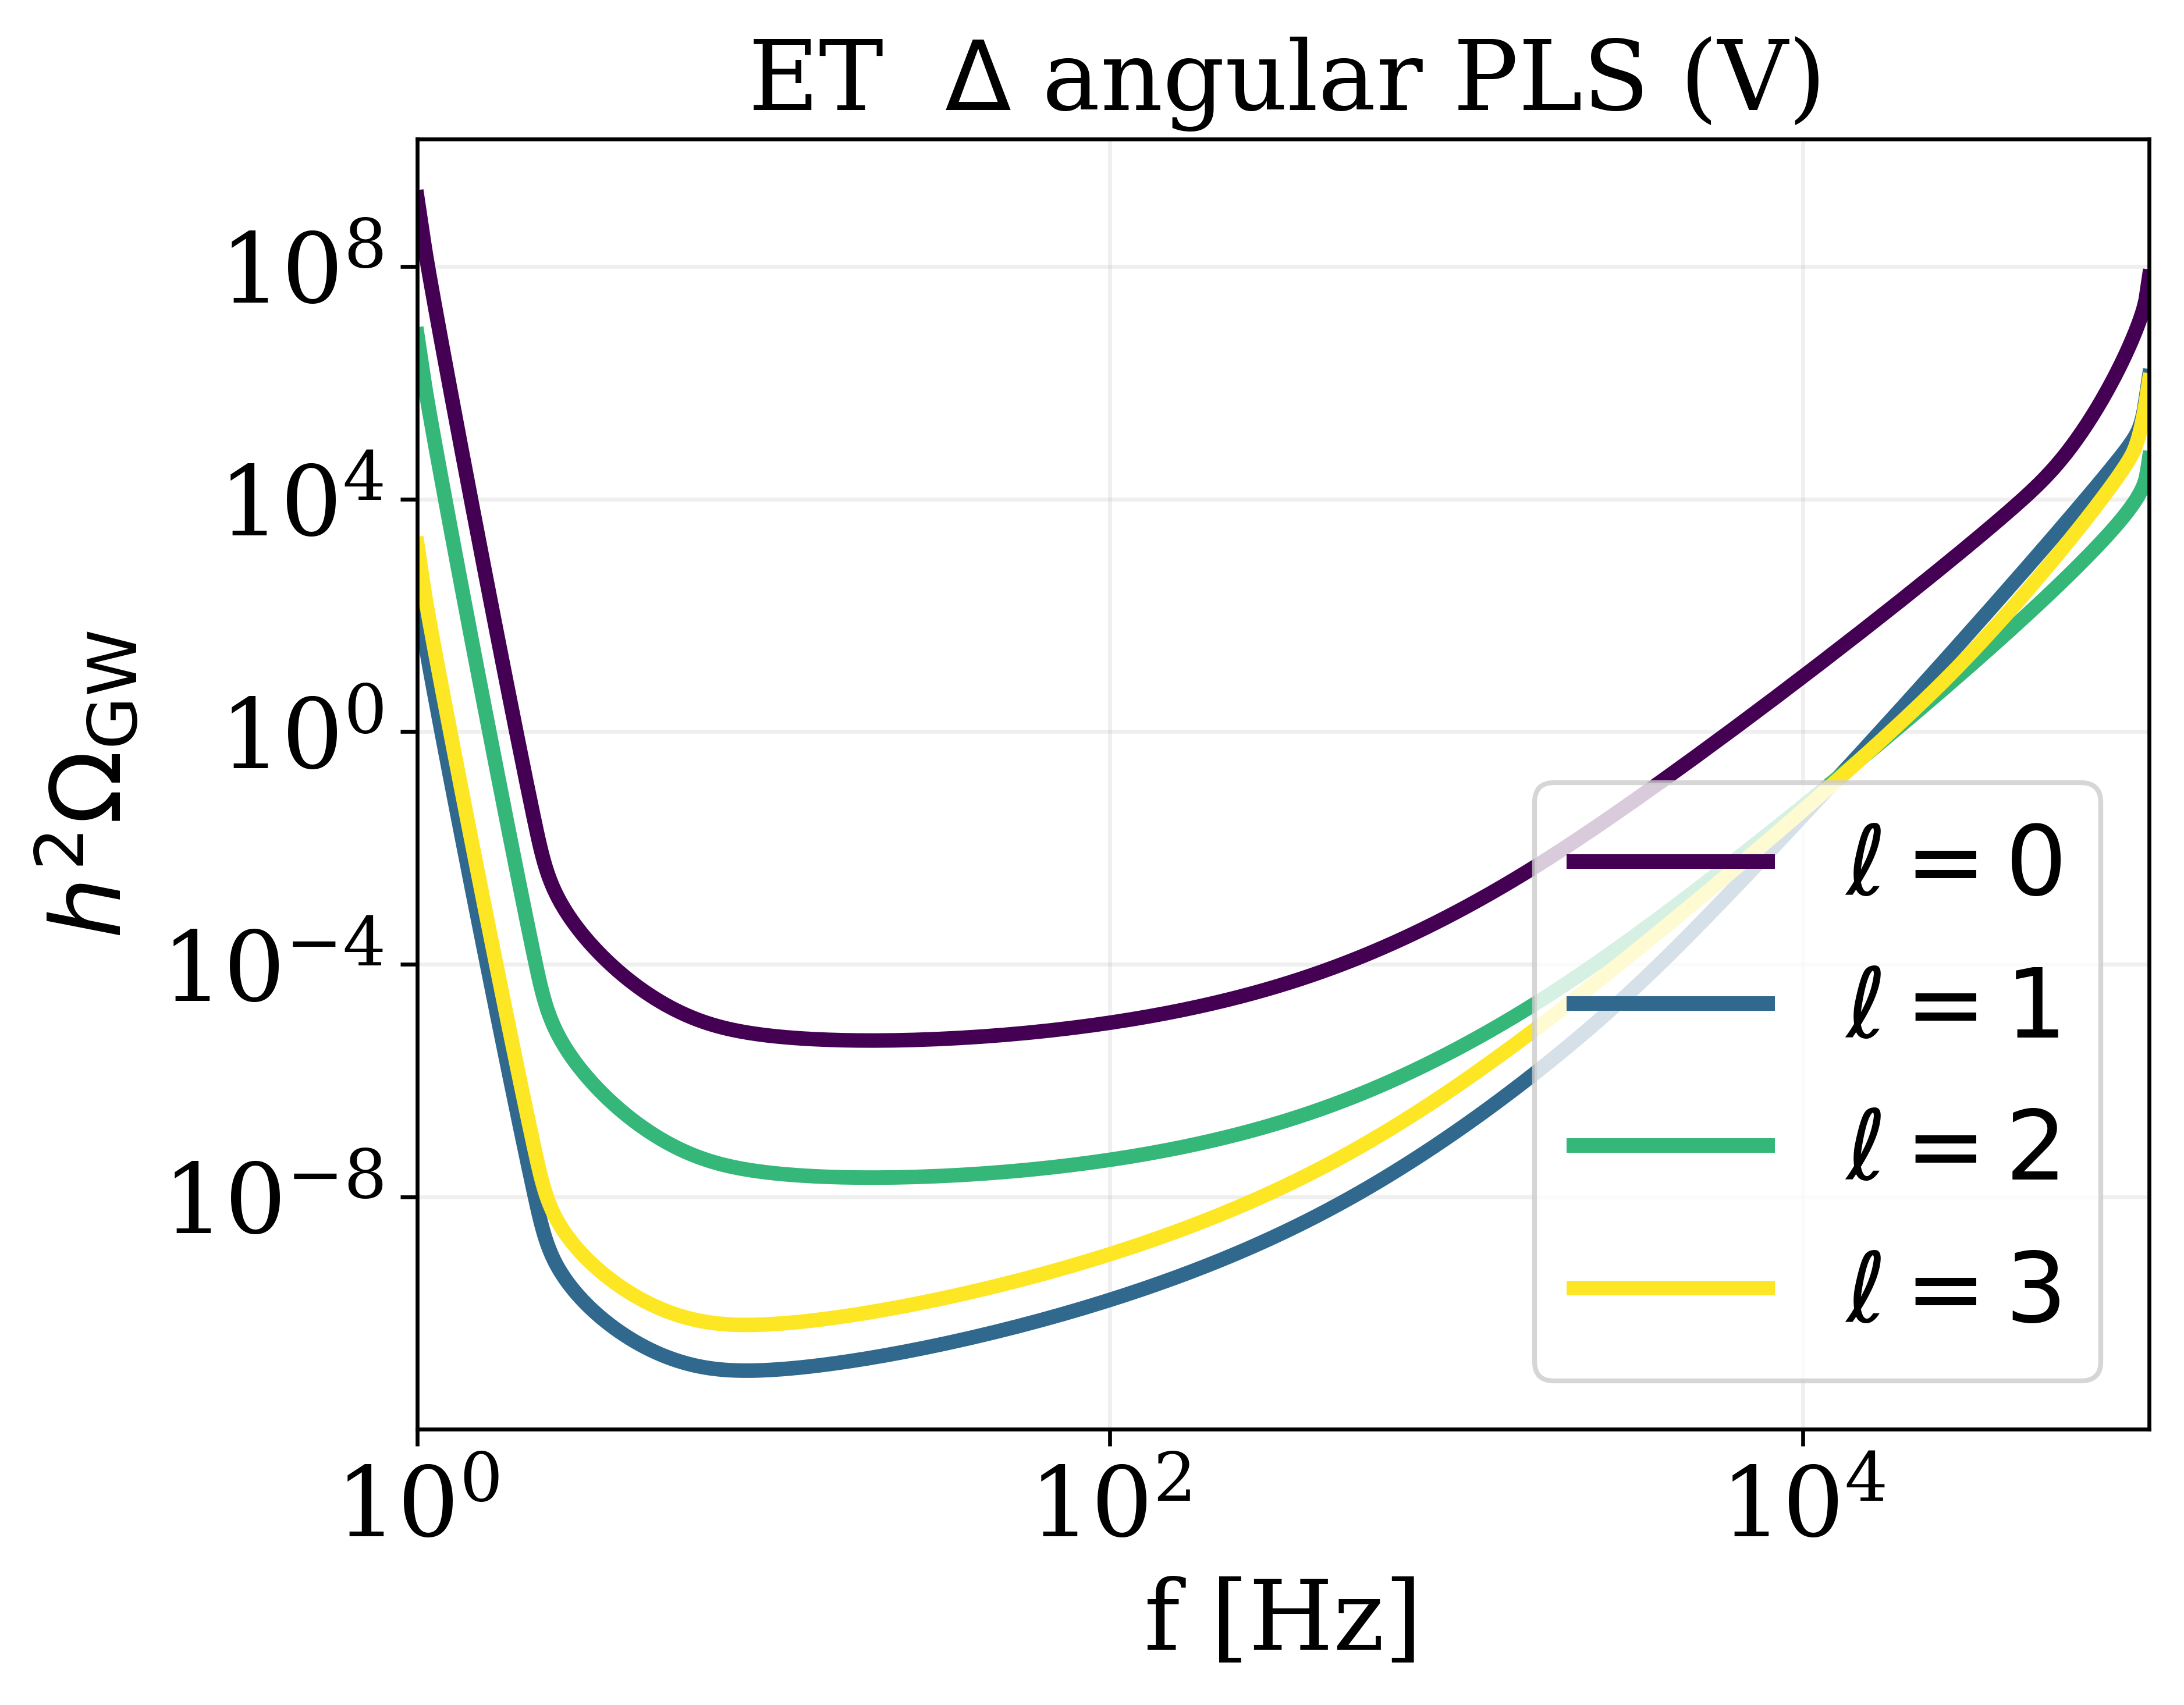

In [108]:
# V

pls0_V = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 0, f, 'V', 0, fref, snr, Tobs, 1)
pls1_V = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 1, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls2_V = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 2, f, 'V', 0, fref, snr, Tobs,  1e-3)
pls3_V = Sensitivity_ell.APLS_ell('ET X', 'ET Y', 3, f, 'V', 0, fref, snr, Tobs,  1e-3)

idx_min_0_V = np.argmin(pls0_V)
idx_min_1_V = np.argmin(pls1_V)
idx_min_2_V = np.argmin(pls2_V)
idx_min_3_V = np.argmin(pls3_V)

print("Min pls_0_V:", pls0_V[idx_min_0_V], "f min:", f[idx_min_0_V])
print("Min pls_1_V:", pls1_V[idx_min_1_V], "f min:", f[idx_min_1_V])
print("Min pls_2_V:", pls2_V[idx_min_2_V], "f min:", f[idx_min_2_V])
print("Min pls_3_V:", pls3_V[idx_min_3_V], "f min:", f[idx_min_3_V])

colors = plt.cm.viridis(np.linspace(0, 1, 4))
plt.plot(f, pls0_V, label=r'$\ell=0$', color=colors[0], rasterized=True)
plt.plot(f, pls1_V, label=r'$\ell=1$', color=colors[1], rasterized=True)
plt.plot(f, pls2_V, label=r'$\ell=2$', color=colors[2], rasterized=True)
plt.plot(f, pls3_V, label=r'$\ell=3$', color=colors[3], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}$')
plt.title(r'ET  $\Delta$ angular PLS (V)')
plt.xlim(1, 1e5)
plt.grid(alpha=0.2, which='both')
plt.legend(loc= 'lower right')

* ET $\Delta$ + CE sensitivity to X polarization modes

Min pls_t: 1.7281948849275153e-12 f min: 15.025223969544635
Min pls_v: 2.890346607628161e-12 f min: 15.98998224253227


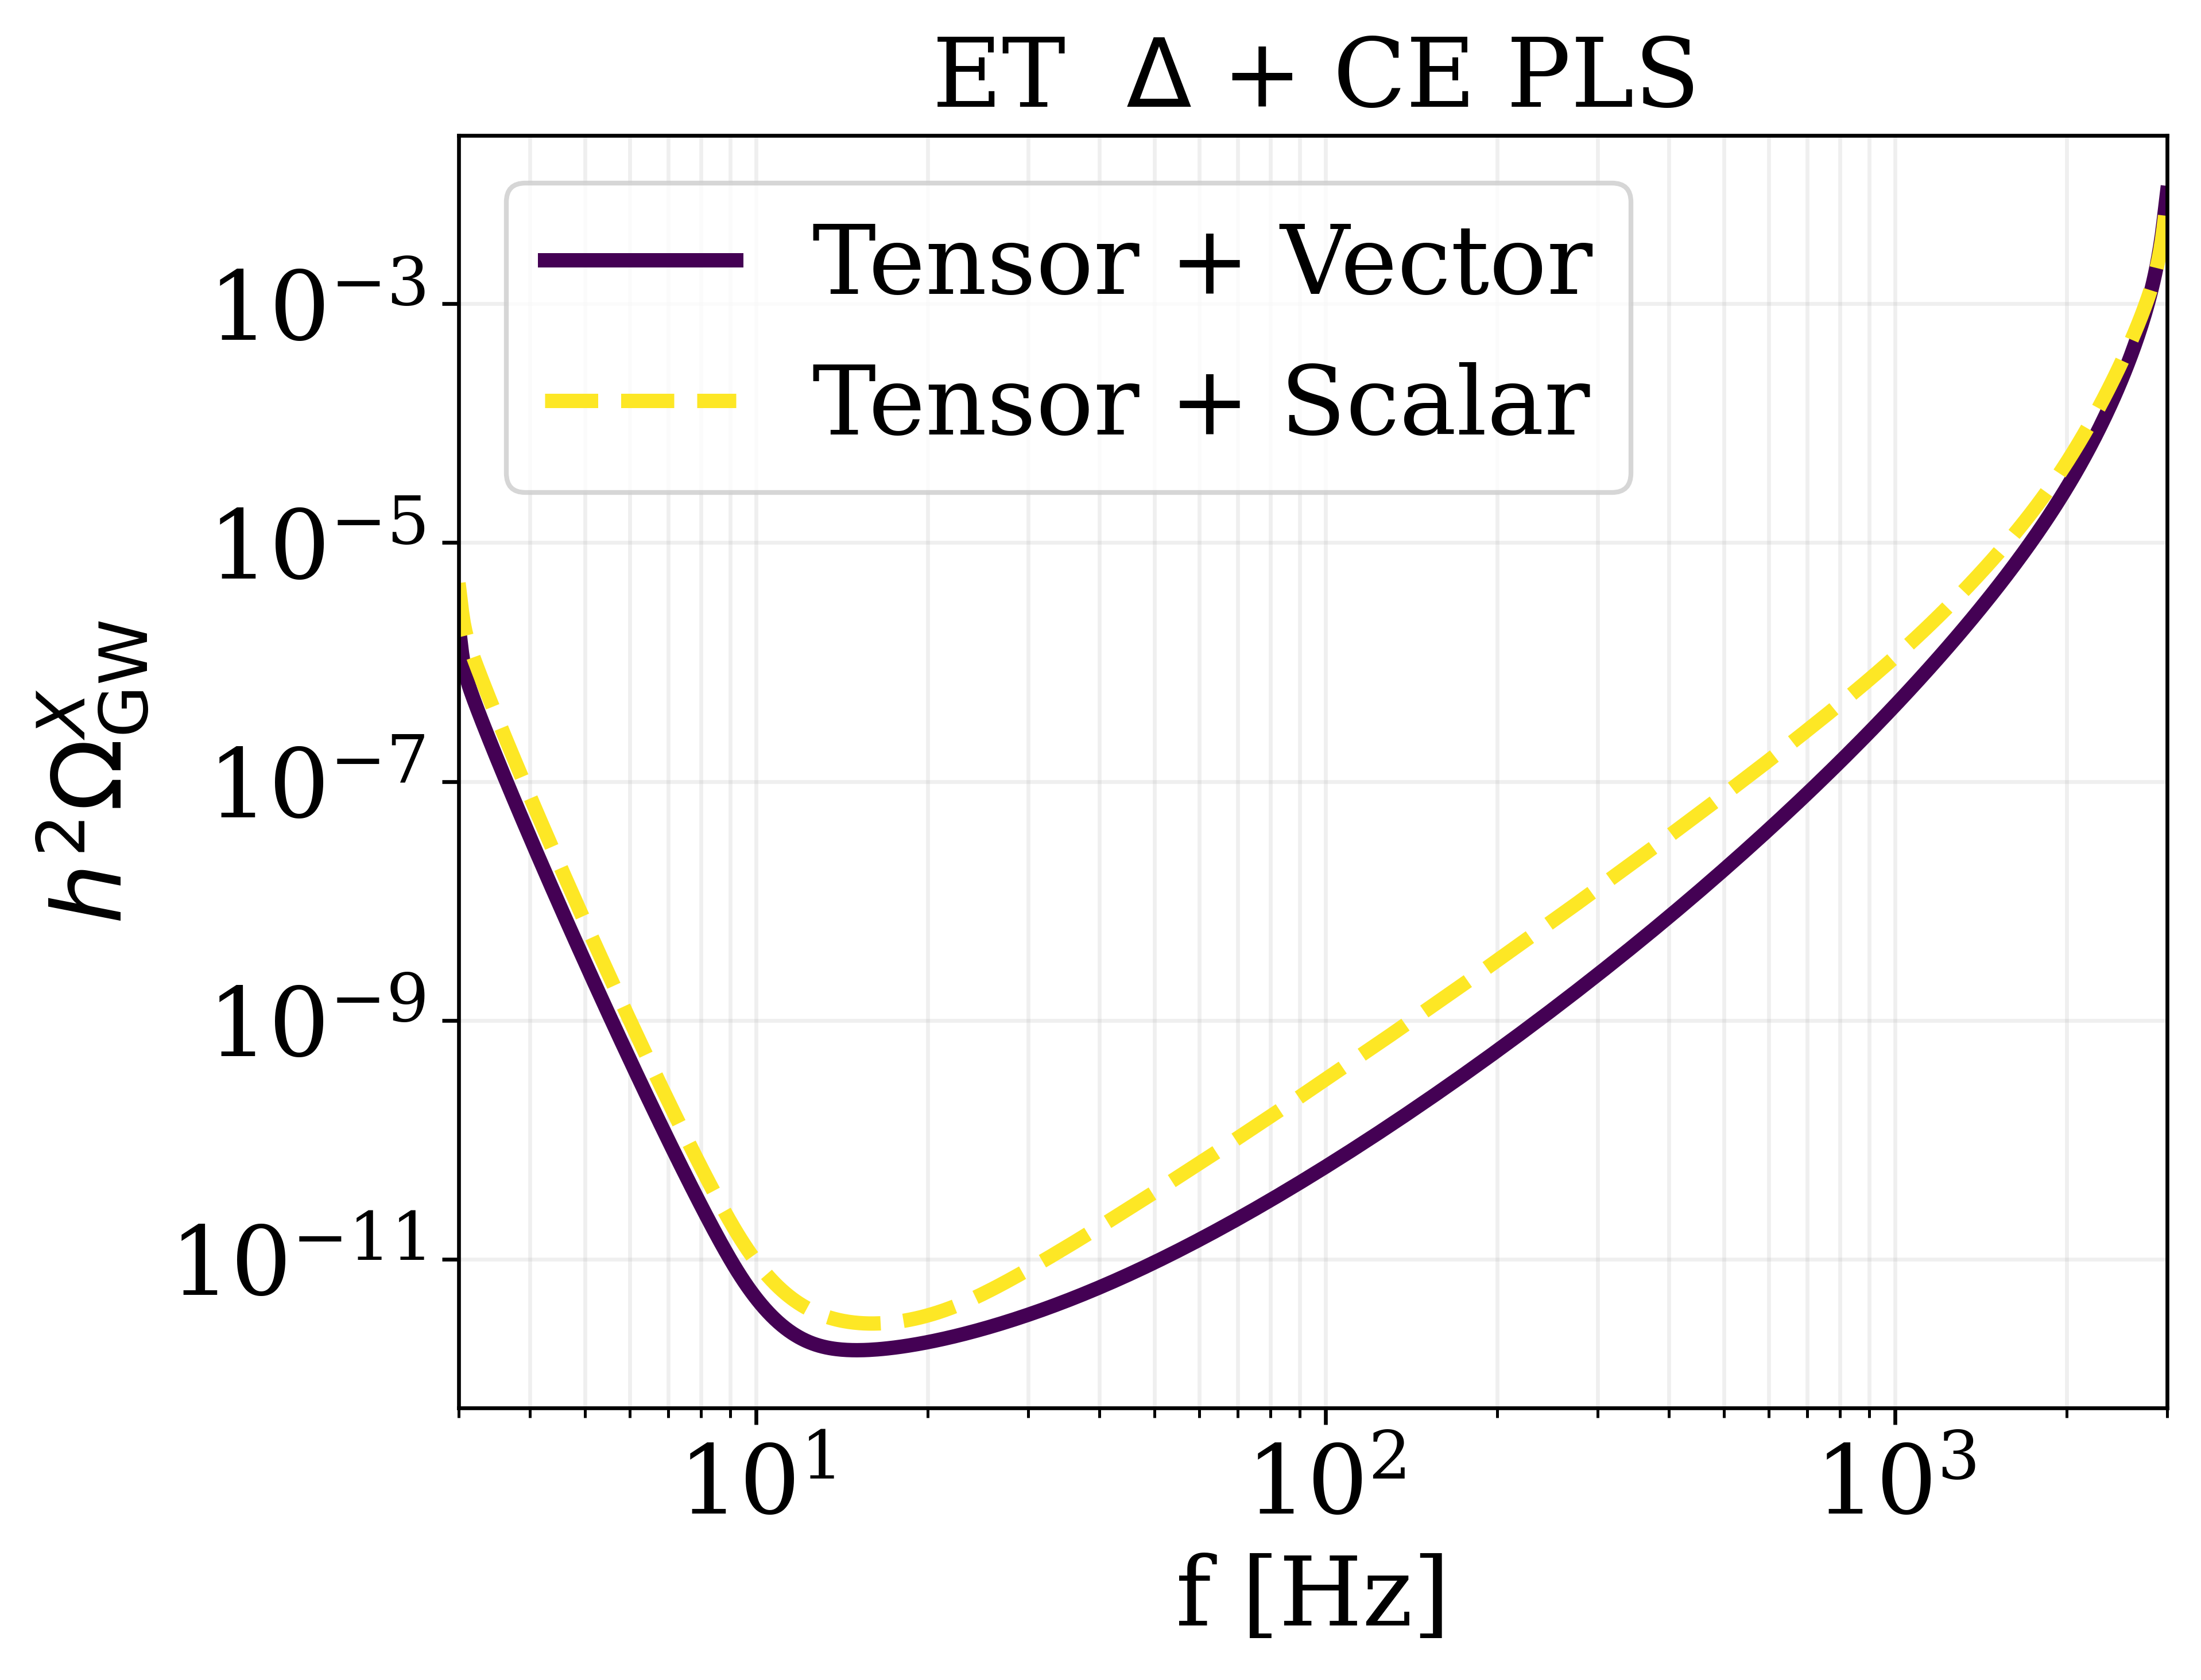

In [109]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_tv_etCE = pls.PLS_2pol('ET X', 'ET Y', 'CE', f, fref, 'v', snr, Tobs, 0, None)
pls_ts_etCE = pls.PLS_2pol('ET X', 'ET Y', 'CE', f, fref, 's', snr, Tobs, 0, None)

idx_min_tv = np.argmin(pls_tv_etCE)
idx_min_ts = np.argmin(pls_ts_etCE)

print("Min pls_t:", pls_tv_etCE[idx_min_tv], "f min:", f[idx_min_tv])
print("Min pls_v:", pls_ts_etCE[idx_min_ts], "f min:", f[idx_min_ts])

colors = plt.cm.viridis(np.linspace(0, 1, 2))
plt.plot(f, pls_tv_etCE, label='Tensor + Vector', color=colors[0], rasterized=True)
plt.plot(f, pls_ts_etCE, label='Tensor + Scalar', linestyle='--', color=colors[1], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^X$')
plt.xlim(3, 3e3)
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()

* LIGO + Virgo sensitivity to M polarization (M = t, v, s)

Min pls_t: 1.2739336826953004e-11 f min: 18.87643832883103
Min pls_v: 1.2186045954711366e-11 f min: 33.50960455403469
Min pls_s: 1.3194124873387535e-11 f min: 25.58893349922307


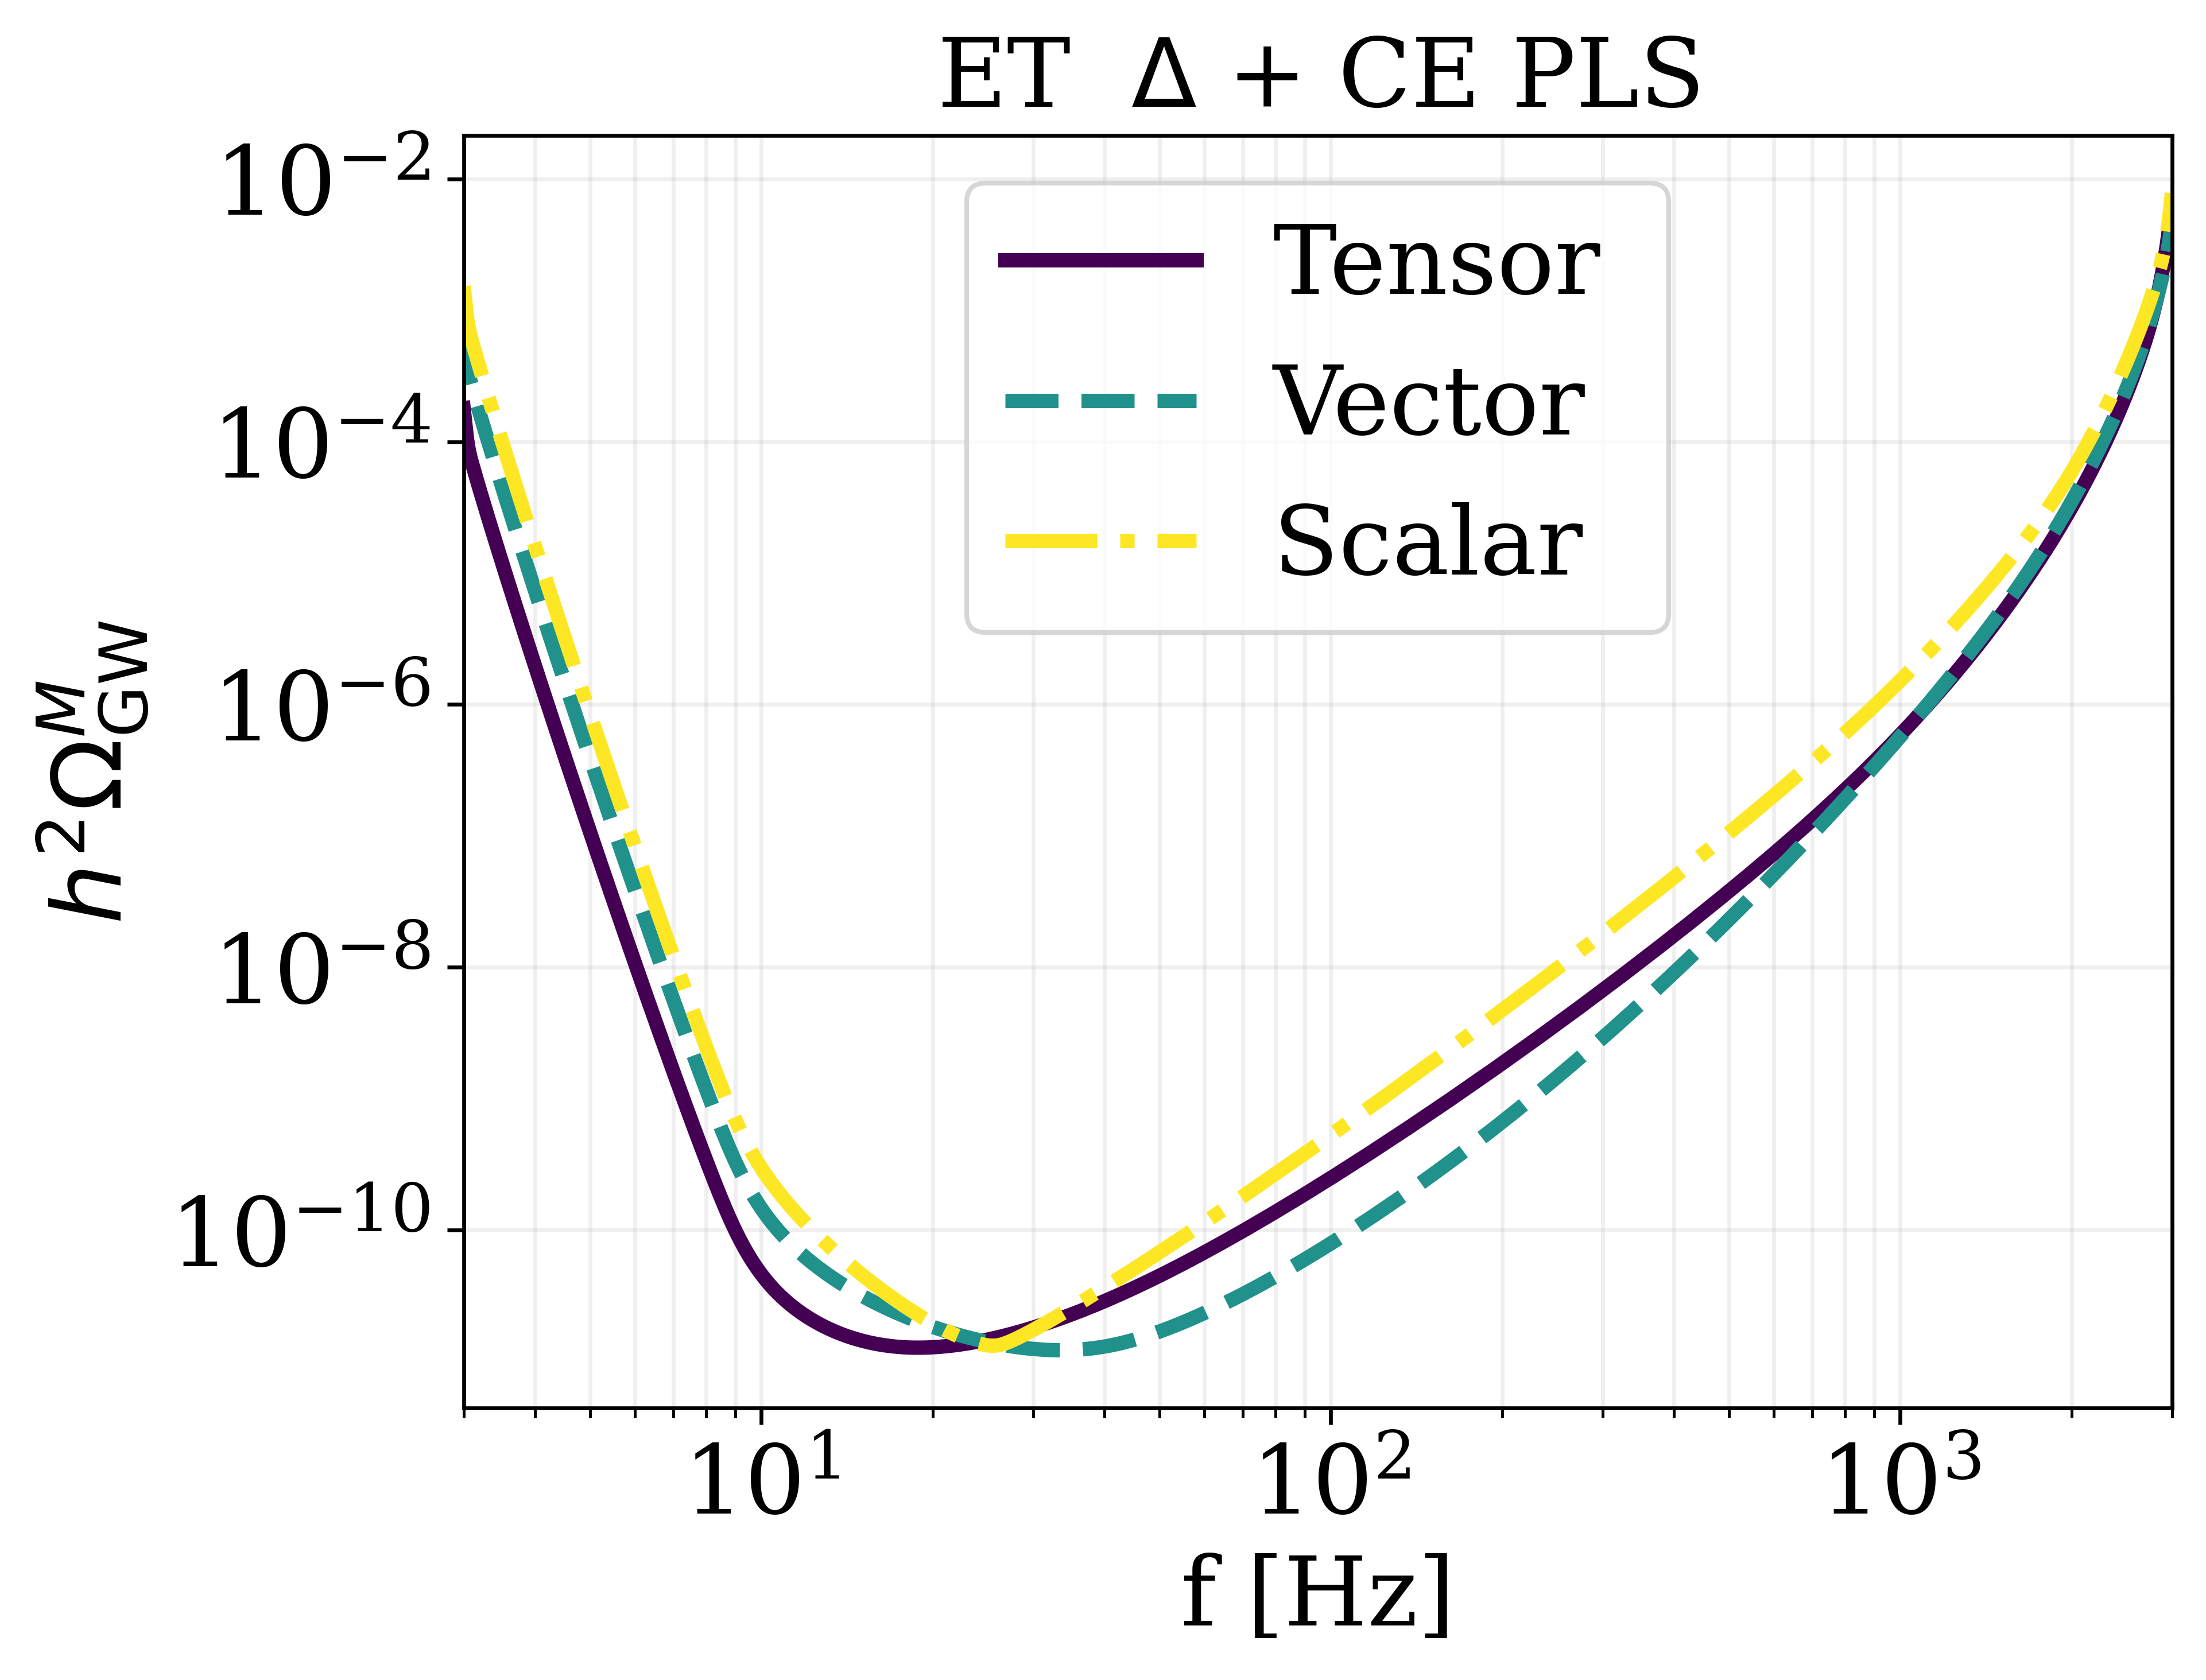

In [110]:
f = np.logspace(np.log10(3), np.log10(3000), 1000)

fref = 25
snr = 1
Tobs = 1

pls_t_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 't', snr, Tobs, 0, None)
pls_v_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 'v', snr, Tobs, 0, None)
pls_s_etCE = pls.PLS_3pol('ET X', 'ET Y', 'CE', f, fref, 's', snr, Tobs, 0, None)

idx_min_t = np.argmin(pls_t_etCE)
idx_min_v = np.argmin(pls_v_etCE)
idx_min_s = np.argmin(pls_s_etCE)

print("Min pls_t:", pls_t_etCE[idx_min_t], "f min:", f[idx_min_t])
print("Min pls_v:", pls_v_etCE[idx_min_v], "f min:", f[idx_min_v])
print("Min pls_s:", pls_s_etCE[idx_min_s], "f min:", f[idx_min_s])

colors = plt.cm.viridis(np.linspace(0, 1, 3))
plt.plot(f, pls_t_etCE, label='Tensor ', color=colors[0], rasterized=True)
plt.plot(f, pls_v_etCE, label='Vector', linestyle='--', color=colors[1], rasterized=True)
plt.plot(f, pls_s_etCE, label='Scalar', linestyle='-.', color=colors[2], rasterized=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$h^2\Omega_{\rm GW}^M$')
plt.xlim(3, 3e3)
plt.title(r'ET  $\Delta$ + CE PLS')
plt.grid(alpha=0.2, which='both')
plt.legend()